# Factors in a business success according to Yelp
### Group: Connor Fitzmaurice 12376761, Kevin Fitzpatrick 15204690, Stephen Murphy 15200153

# Q) Sentiment and Textual Analysis

Through analysis of text in user submitted reviews and tips, we will attempt to determine what factors increase the chance of a business being successful and lead to positive reviews and for this business. For a restaurant, it is important to know what factors are most regularly mentioned in reviews and which could be improved on by a business in order to obtain better reviews and a better rating.

This data exploration and data modelling is facilitated by work done as part of the data exploration stage which prepared the text of the tips and abt datasets for further analysis. As part of this, sentiment was calculated individually for tips and reviews with numerical values representing sentiment. The factors mentioned in a tip/review were also calculated with a scale from 0 upwards denoting the weight given towards a factor. These factors were the following, Location, Service, Price, Food, Beverages. For each business, this analysis was then averaged to calculate the main focus of the business based off the reviews/tips recieved and the percenatage of positive/negative reviews/tips.

Any files, plots or other outputs from this notebook will be saved in the Text Analysis folder

## Data Quality Report
Some issues currently exist with working with the text of the reviews and tips in their datasets due to the structure of the panda column and it current format:
1. Certain Factors such as food may be significantly more present making it difficult to weigh against other features due to possible high outliers adn skew any analysis.
2. Large amount of features which are possiblyt relevant to text makes plotting difficult
3. Duplicate rows as a result of multiple reviews for each business. This could cause issues when looking at overall data for businesses such as percentage of positive tips
4. There may be some businesses with too few reviews, meaning inaccurate results.

Solutions:
1. Check for outliers and truncate if they create issues such as bias
2. Break down plotting individually against text/target features and remove if no relationship
3. Remove the duplicate rows, only keeping one row per business.
4. Remove businesses with too few businesses

In [1]:
#import libraries necceary in order to attmept to answer the question
import pandas as pd
import numpy as np
import json
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.util import *
import seaborn as sns

C:\Users\ray\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
# Import packages needed for regression
import statsmodels
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [3]:
# Import stop words from nltk
stop = stopwords.words('english')

In [4]:
%matplotlib inline

In [5]:
 #Set panda options so whole lines for tips can be view
pd.set_option('max_colwidth', 500)
pd.set_option("display.max_columns",500)

# Tips Only Analysis

## Overall analysis on tips text using nltk
As part of the data exploration stage, the overall text for tips will be analysed using the nltk library. The most common words will be determined to give an initial understanding of the factors which are commonly mentioned in tips and the overall sentiment of tips

In [6]:
# Open text file to ntlk analysis
with open('text_preparation/tips.txt', 'r') as file:
    tips_text= file.read()

In [7]:
#Tokenise text
tip_words = nltk.word_tokenize(tips_text)
tips_text_word = nltk.Text(tip_words)

In [8]:
#Tidy up text for analysis
tips_text_word = [w.lower() for w in tips_text_word] 
tips_text_word = [w for w in tips_text_word if not w in stop]
tips_text_word = [w for w in  tips_text_word if len(w) > 2]

In [9]:
# Custom stop wordlist to remove stopwords and other common words which aren't very informative
stopwords_custom = ["the", "n't", "get", "this", "one", "they", "always", "come", "today", "day" "back", "got", "you", "'ve" , "ask", "never",
           "still","store", "see", "and", "'re", "take", "sure", "just", "going", "..."]
tips_text_word = [w for w in tips_text_word if not w in stopwords_custom]

### Text analysis

In [10]:
# Calculate the most frequent words
word_frequency_tips = nltk.FreqDist(tips_text_word)
print("\nMost frequent 100 words(excluding stopwords) before used by Yelp users when leaving a tip were ",word_frequency_tips.most_common(100))


Most frequent 100 words(excluding stopwords) before used by Yelp users when leaving a tip were  [('great', 6330), ('good', 4273), ('food', 4035), ('place', 3585), ('service', 3244), ('best', 2956), ('love', 2523), ('time', 2151), ('awesome', 1467), ('like', 1435), ('nice', 1411), ('lunch', 1352), ('friendly', 1255), ('chicken', 1227), ('try', 1182), ('amazing', 1169), ('back', 1165), ('staff', 1136), ('pizza', 1063), ('free', 1037), ('day', 1010), ('new', 988), ('happy', 980), ('ever', 933), ('delicious', 889), ('really', 880), ('breakfast', 867), ('hour', 821), ('order', 756), ('night', 727), ('bar', 726), ('home', 722), ('dinner', 719), ('salad', 709), ('wait', 693), ('better', 674), ('people', 673), ('make', 666), ('favorite', 649), ('yummy', 639), ('hot', 636), ('location', 612), ('menu', 612), ('first', 602), ('cheese', 600), ('way', 587), ('little', 584), ('beer', 582), ('fresh', 571), ('eat', 570), ('check', 557), ('excellent', 557), ('coffee', 556), ('yum', 554), ('fast', 545)

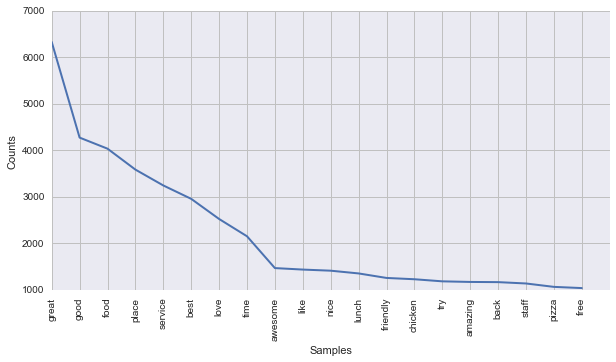

In [11]:
# Plot the most frequent 20 word
fig = plt.figure(figsize=(10, 5)) 
word_frequency_tips.plot(20,cumulative=False,)
plt.savefig('top_20_words.png')
plt.show()

In [12]:
print("Great is the most popular word at a frequency of", tips_text_word.count('great'))

Great is the most popular word at a frequency of 6330


Through calculating the most common 100 words in the tip text and plotting the top 20 words an initial understanding can be gained. Any descriptive word or adjective present is positive with the exception of 'bad' although this does not account for positive words which are prefaced negatively such as 'not good'. The factors; food, service, location, price and drinks all being mentioned with food the most prominent.

In [13]:
# There were the following unique words
print('There are ' + str(len(set(tips_text_word))) + ' unique words in the dataset')

There are 24659 unique words in the dataset


Dispersion plot to look at the assoication between possible factors in a business success such as food, service, place and staff
and positive and negative descriptive words

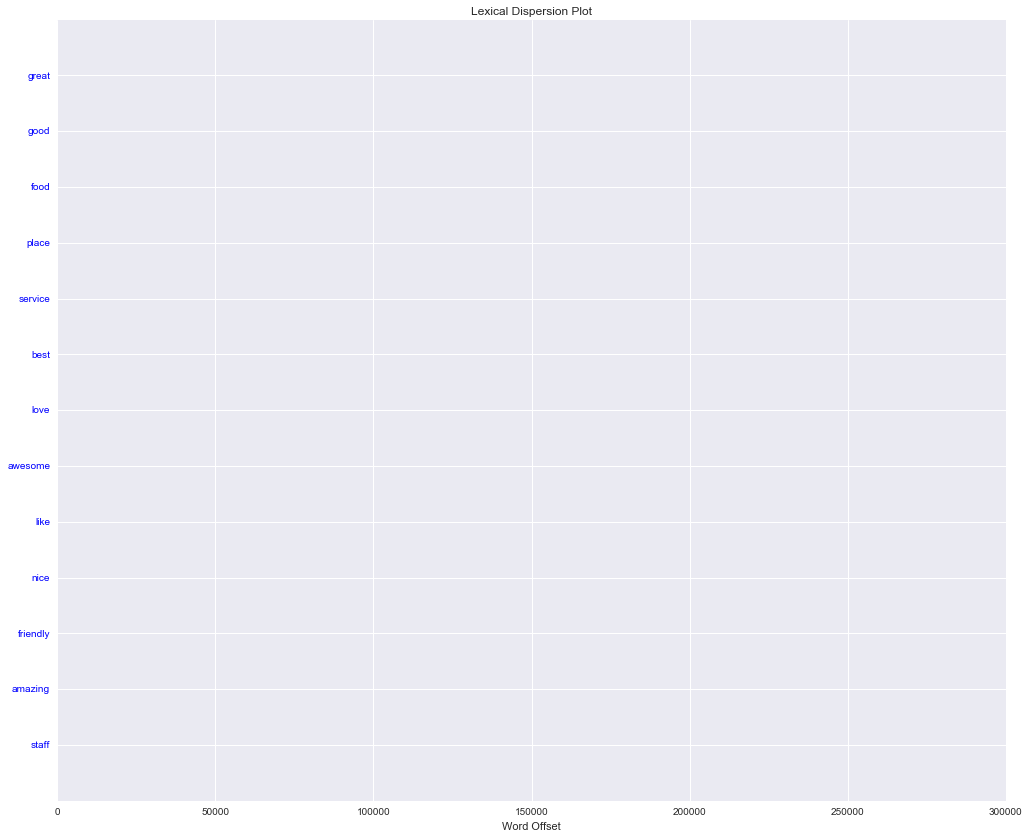

In [14]:
Tip_text = nltk.Text(tips_text_word)
fig = plt.figure(figsize=(17, 14)) 
Tip_text.dispersion_plot(['great', 'good', 'food', 'place', 'service','best','love','awesome','like','nice',
                                'friendly','amazing', 'staff',])
plt.savefig('Text_Analysis/top_20_words_dispersion.png')
plt.show()

Based on the limited textual analysis done at this point, it can be suggested that in Yelp tips more positive words are used in conjunction with words such as food, service, place and staff suggesting an association between the two. More conclusive analysis can be done by looking at the cells line by line

## Cell by Cell analysis of tips

In [15]:
tipsDF = pd.read_csv('text_preparation/yelp_tips_prepared.csv', encoding = 'latin-1' )

In [16]:
tipsDF.head()

Unnamed: 0             business_id        date  likes  \
0           0  cE27W9VPgO88Qxe4ol6y_g  2013-04-18      0   
1           1  mVHrayjG3uZ_RLHkLj-AMg  2013-01-06      1   
2           2  KayYbHCt-RkbGcPdGOThNg  2013-12-03      0   
3           3  KayYbHCt-RkbGcPdGOThNg  2015-07-08      0   
4           4  1_lU0-eSWJCRvNGk78Zh9Q  2015-10-25      0   

                                                                                                                                                                                               text  \
0                                                                                                                                                               ["don't", 'waste', 'your', 'time.']   
1  ['your', 'gps', 'will', 'not', 'allow', 'you', 'to', 'find', 'this', 'place.', 'put', 'rankin', 'police', 'department', 'in', 'instead.', 'they', 'are', 'directly', 'across', 'the', 'street.']   
2                                                                                                                                                                   ['great', 'drink', 'specials!']   
3                                                                                           ['friendly', 'staff,', 'good', 'food,', 'great', 'beer', 'selection,', 'and', 'relaxing', 'atmosphere']   
4                                                                                                                                                                     ['beautiful', 'restoration.']   

  type                 user_id  Sentiment  Food  Service  Price  Location  \
0  tip  -6rEfobYjMxpUWLNxszaxQ         -1     0        0      0         0   
1  tip  EZ0r9dKKtEGVx2CdnowPCw         -1     0        0      0         2   
2  tip  xb6zEQCw9I-Gl0g06e1KsQ          1     1        0      1         0   
3  tip  QawZN4PSW7ng_9SP7pjsVQ          3     1        1      0         1   
4  tip  MLQre1nvUtW-RqMTc4iC9A          1     0        0      0         0   

   Beverages Tip_Focus  Positve Percentage  Negative Percentage  \
0          0   Neutral                 0.0                100.0   
1          0  Location                 0.0                100.0   
2          1   Neutral               100.0                  0.0   
3          1   Neutral               100.0                  0.0   
4          0   Neutral                50.0                  0.0   

  Business_Focus  WordCount  
0           Food          4  
1           Food         22  
2           Food          3  
3           Food         10  
4           Food          2

In [17]:
# Get rid of unamed column in tips
tipsDF = tipsDF.drop(tipsDF.columns[0], axis = 1)
tipsDF.head()

business_id        date  likes  \
0  cE27W9VPgO88Qxe4ol6y_g  2013-04-18      0   
1  mVHrayjG3uZ_RLHkLj-AMg  2013-01-06      1   
2  KayYbHCt-RkbGcPdGOThNg  2013-12-03      0   
3  KayYbHCt-RkbGcPdGOThNg  2015-07-08      0   
4  1_lU0-eSWJCRvNGk78Zh9Q  2015-10-25      0   

                                                                                                                                                                                               text  \
0                                                                                                                                                               ["don't", 'waste', 'your', 'time.']   
1  ['your', 'gps', 'will', 'not', 'allow', 'you', 'to', 'find', 'this', 'place.', 'put', 'rankin', 'police', 'department', 'in', 'instead.', 'they', 'are', 'directly', 'across', 'the', 'street.']   
2                                                                                                                                                                   ['great', 'drink', 'specials!']   
3                                                                                           ['friendly', 'staff,', 'good', 'food,', 'great', 'beer', 'selection,', 'and', 'relaxing', 'atmosphere']   
4                                                                                                                                                                     ['beautiful', 'restoration.']   

  type                 user_id  Sentiment  Food  Service  Price  Location  \
0  tip  -6rEfobYjMxpUWLNxszaxQ         -1     0        0      0         0   
1  tip  EZ0r9dKKtEGVx2CdnowPCw         -1     0        0      0         2   
2  tip  xb6zEQCw9I-Gl0g06e1KsQ          1     1        0      1         0   
3  tip  QawZN4PSW7ng_9SP7pjsVQ          3     1        1      0         1   
4  tip  MLQre1nvUtW-RqMTc4iC9A          1     0        0      0         0   

   Beverages Tip_Focus  Positve Percentage  Negative Percentage  \
0          0   Neutral                 0.0                100.0   
1          0  Location                 0.0                100.0   
2          1   Neutral               100.0                  0.0   
3          1   Neutral               100.0                  0.0   
4          0   Neutral                50.0                  0.0   

  Business_Focus  WordCount  
0           Food          4  
1           Food         22  
2           Food          3  
3           Food         10  
4           Food          2

In [18]:
# Create dataframe with only one row for each business
tipsDF_unique = tipsDF.drop_duplicates()
tipsDF_unique.head()

business_id        date  likes  \
0  cE27W9VPgO88Qxe4ol6y_g  2013-04-18      0   
1  mVHrayjG3uZ_RLHkLj-AMg  2013-01-06      1   
2  KayYbHCt-RkbGcPdGOThNg  2013-12-03      0   
3  KayYbHCt-RkbGcPdGOThNg  2015-07-08      0   
4  1_lU0-eSWJCRvNGk78Zh9Q  2015-10-25      0   

                                                                                                                                                                                               text  \
0                                                                                                                                                               ["don't", 'waste', 'your', 'time.']   
1  ['your', 'gps', 'will', 'not', 'allow', 'you', 'to', 'find', 'this', 'place.', 'put', 'rankin', 'police', 'department', 'in', 'instead.', 'they', 'are', 'directly', 'across', 'the', 'street.']   
2                                                                                                                                                                   ['great', 'drink', 'specials!']   
3                                                                                           ['friendly', 'staff,', 'good', 'food,', 'great', 'beer', 'selection,', 'and', 'relaxing', 'atmosphere']   
4                                                                                                                                                                     ['beautiful', 'restoration.']   

  type                 user_id  Sentiment  Food  Service  Price  Location  \
0  tip  -6rEfobYjMxpUWLNxszaxQ         -1     0        0      0         0   
1  tip  EZ0r9dKKtEGVx2CdnowPCw         -1     0        0      0         2   
2  tip  xb6zEQCw9I-Gl0g06e1KsQ          1     1        0      1         0   
3  tip  QawZN4PSW7ng_9SP7pjsVQ          3     1        1      0         1   
4  tip  MLQre1nvUtW-RqMTc4iC9A          1     0        0      0         0   

   Beverages Tip_Focus  Positve Percentage  Negative Percentage  \
0          0   Neutral                 0.0                100.0   
1          0  Location                 0.0                100.0   
2          1   Neutral               100.0                  0.0   
3          1   Neutral               100.0                  0.0   
4          0   Neutral                50.0                  0.0   

  Business_Focus  WordCount  
0           Food          4  
1           Food         22  
2           Food          3  
3           Food         10  
4           Food          2

In [19]:
# Number of rows in unique business dataset
print("Number of unique businesses")
print(len(tipsDF_unique))

Number of unique businesses
49972


In [20]:
#Get amount of rows and features in tips csv
print('Number of rows and features', tipsDF.shape)

Number of rows and features (50000, 17)


In [21]:
#Get types of features in tips csv
print('Number of rows and features', tipsDF.dtypes )

Number of rows and features business_id             object
date                    object
likes                    int64
text                    object
type                    object
user_id                 object
Sentiment                int64
Food                     int64
Service                  int64
Price                    int64
Location                 int64
Beverages                int64
Tip_Focus               object
Positve Percentage     float64
Negative Percentage    float64
Business_Focus          object
WordCount                int64
dtype: object


In [22]:
# Check for null values
print('Number of missing values')
print(tipsDF.isnull().sum())

Number of missing values
business_id            0
date                   0
likes                  0
text                   0
type                   0
user_id                0
Sentiment              0
Food                   0
Service                0
Price                  0
Location               0
Beverages              0
Tip_Focus              0
Positve Percentage     0
Negative Percentage    0
Business_Focus         0
WordCount              0
dtype: int64


In [23]:
# Calculate counts for each category of tip focus
tipsDF.groupby('Tip_Focus').count()

business_id   date  likes   text   type  user_id  Sentiment   Food  \
Tip_Focus                                                                       
Beverages         1600   1600   1600   1600   1600     1600       1600   1600   
Food             12767  12767  12767  12767  12767    12767      12767  12767   
Location          6598   6598   6598   6598   6598     6598       6598   6598   
Neutral          24897  24897  24897  24897  24897    24897      24897  24897   
Price             1769   1769   1769   1769   1769     1769       1769   1769   
Service           2369   2369   2369   2369   2369     2369       2369   2369   

           Service  Price  Location  Beverages  Positve Percentage  \
Tip_Focus                                                            
Beverages     1600   1600      1600       1600                1600   
Food         12767  12767     12767      12767               12767   
Location      6598   6598      6598       6598                6598   
Neutral      24897  24897     24897      24897               24897   
Price         1769   1769      1769       1769                1769   
Service       2369   2369      2369       2369                2369   

           Negative Percentage  Business_Focus  WordCount  
Tip_Focus                                                  
Beverages                 1600            1600       1600  
Food                     12767           12767      12767  
Location                  6598            6598       6598  
Neutral                  24897           24897      24897  
Price                     1769            1769       1769  
Service                   2369            2369       2369

### Continous Features

In [24]:
#Overall numerical analysis
print("These are the statistics for contionous features in the tips dataset")
print(tipsDF.describe())
contionous_features_tips_statistics = tipsDF.describe()
contionous_features_tips_statistics.to_csv('Text_Analysis/tips_statistics.csv')

These are the statistics for contionous features in the tips dataset
              likes     Sentiment          Food      Service         Price  \
count  50000.000000  50000.000000  50000.000000  50000.00000  50000.000000   
mean       0.010100      0.689880      0.652360      0.15076      0.129740   
std        0.111168      1.278068      1.099987      0.43703      0.411766   
min        0.000000    -12.000000      0.000000      0.00000      0.000000   
25%        0.000000      0.000000      0.000000      0.00000      0.000000   
50%        0.000000      1.000000      0.000000      0.00000      0.000000   
75%        0.000000      1.000000      1.000000      0.00000      0.000000   
max        5.000000     12.000000     19.000000      6.00000      7.000000   

           Location     Beverages  Positve Percentage  Negative Percentage  \
count  50000.000000  50000.000000        50000.000000         50000.000000   
mean       0.367800      0.139120           50.504000            10.2920

The mean for likes is 0 suggesting as previous noted that very few tips recieve even any likes. Most tips were around 10 words in length although there were some outliers such as tips which were 108 words in length. These tips were things such as users submitting whole menus for businesses as tips.

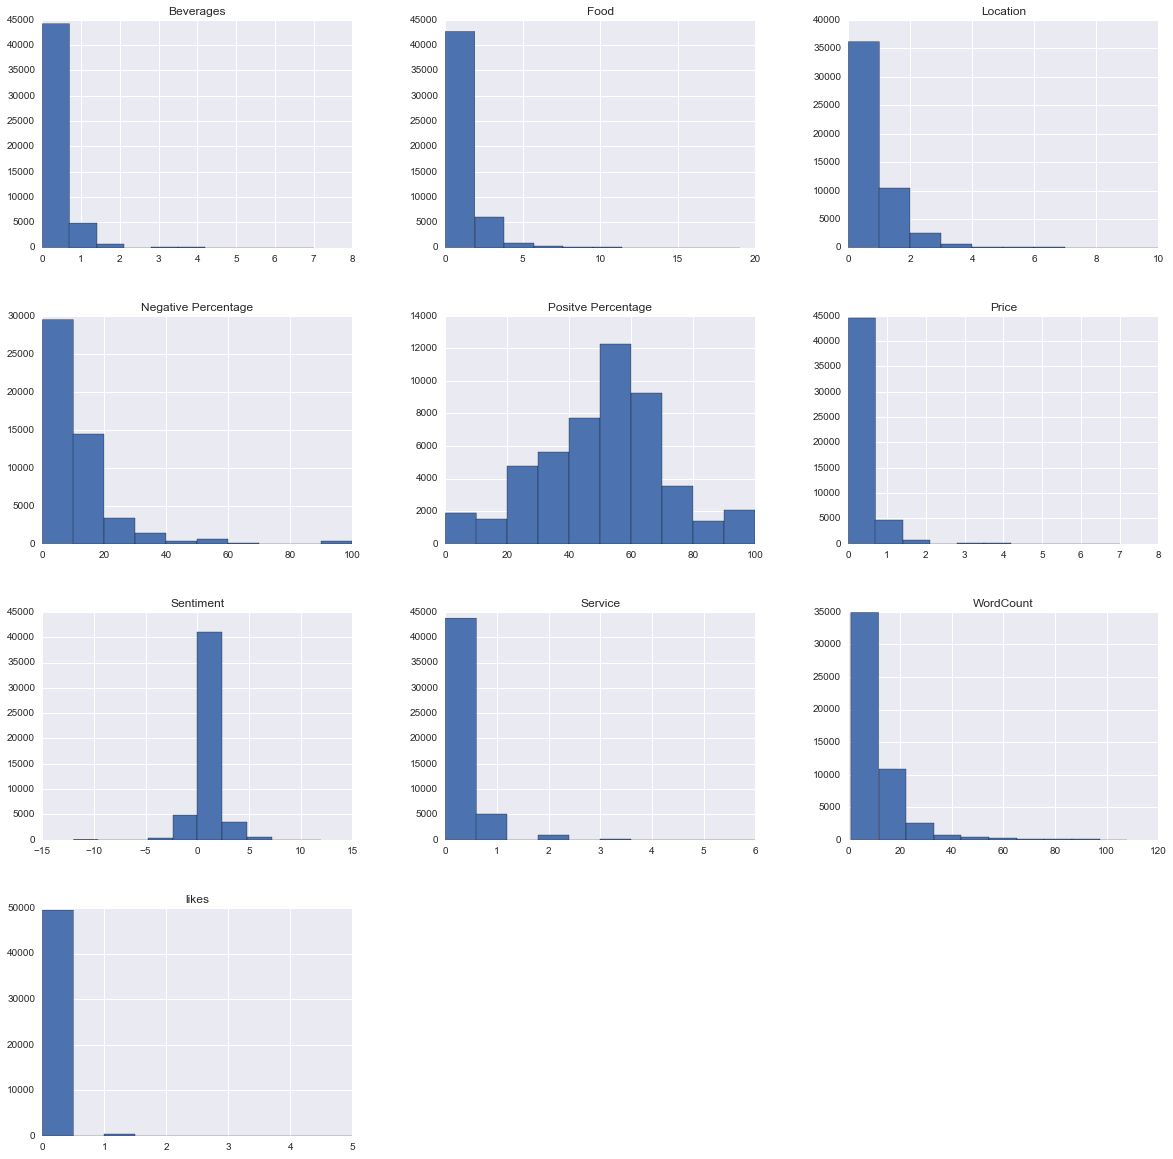

In [25]:
# Histograms for all the contionus features
tipsDF.hist(figsize=(20, 20))
plt.savefig('Text_Analysis/tips_histograms.png')

Most of the above features are of the exponential distribution model with each appearing a sharp drop off in frequency. Positive percentage and sentiment are exceptions as they have a normal distribution

In [26]:
# Check the correlations between the contionous features
print("Correlation of contionous features")
tipsDF.corr()

Correlation of contionous features


likes  Sentiment      Food   Service     Price  \
likes                1.000000  -0.008079  0.015302  0.006120  0.015940   
Sentiment           -0.008079   1.000000  0.179972  0.202623  0.020703   
Food                 0.015302   0.179972  1.000000  0.037756  0.114815   
Service              0.006120   0.202623  0.037756  1.000000  0.041680   
Price                0.015940   0.020703  0.114815  0.041680  1.000000   
Location             0.018230   0.162516  0.130351  0.148797  0.094361   
Beverages            0.005826   0.042815  0.168630  0.023541  0.054880   
Positve Percentage  -0.008531   0.350817  0.152792  0.066584  0.015060   
Negative Percentage  0.018658  -0.251815 -0.043330  0.054084  0.039449   
WordCount            0.047260   0.192201  0.336694  0.263984  0.289882   

                     Location  Beverages  Positve Percentage  \
likes                0.018230   0.005826           -0.008531   
Sentiment            0.162516   0.042815            0.350817   
Food                 0.130351   0.168630            0.152792   
Service              0.148797   0.023541            0.066584   
Price                0.094361   0.054880            0.015060   
Location             1.000000   0.118767            0.062019   
Beverages            0.118767   1.000000            0.023389   
Positve Percentage   0.062019   0.023389            1.000000   
Negative Percentage  0.031300   0.008161           -0.408431   
WordCount            0.414815   0.232995            0.072546   

                     Negative Percentage  WordCount  
likes                           0.018658   0.047260  
Sentiment                      -0.251815   0.192201  
Food                           -0.043330   0.336694  
Service                         0.054084   0.263984  
Price                           0.039449   0.289882  
Location                        0.031300   0.414815  
Beverages                       0.008161   0.232995  
Positve Percentage             -0.408431   0.072546  
Negative Percentage             1.000000   0.081024  
WordCount                       0.081024   1.000000

Based on the above there does not seem to be any strong correlation for particular features such as likes. The feature Word count has strong correlation with several other features possibly due the fact that the longer the tip, the more the user can write about. There is also some correlation between sentiment and features food, price, service, location and beverages. 

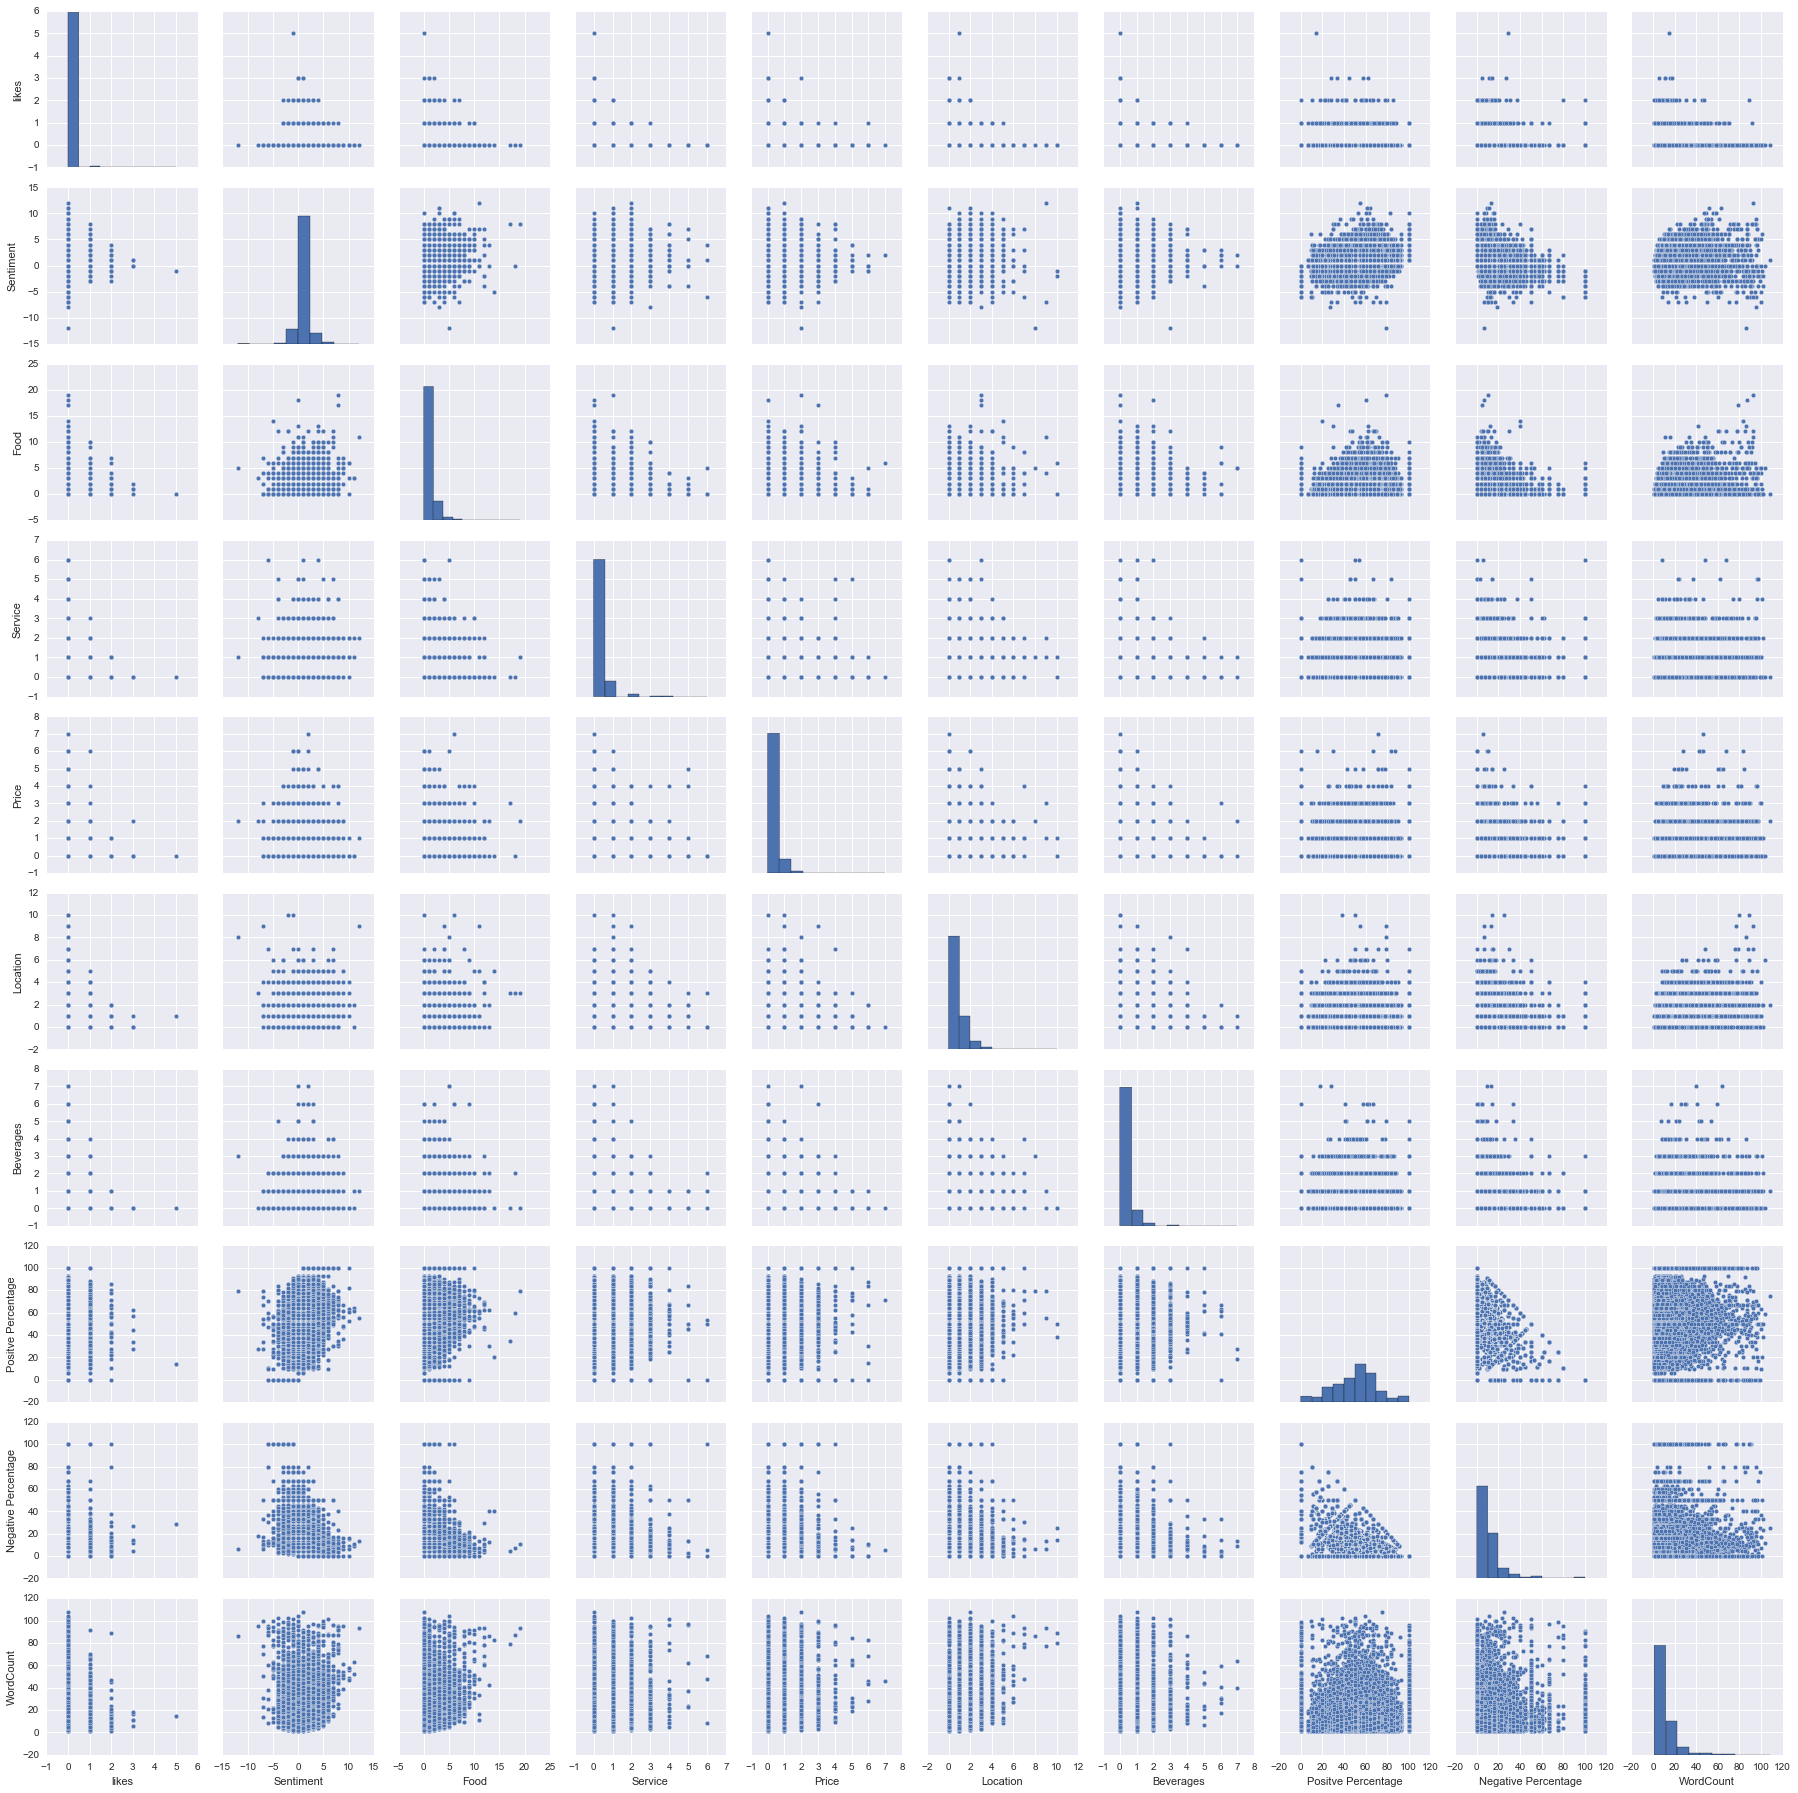

In [27]:
# Correlation matrix for the continous features
sns.pairplot(data=tipsDF)
plt.savefig('Text_Analysis/tips_correlation_histograms.png')

### Categorical Features

In [28]:
# Select object columns
object_columns = tipsDF.select_dtypes(['object']).columns
print(object_columns)

Index(['business_id', 'date', 'text', 'type', 'user_id', 'Tip_Focus',
       'Business_Focus'],
      dtype='object')


In [29]:
# Convert objects to categories
for column in object_columns:
    tipsDF[column] = tipsDF[column].astype('category')
tipsDF.dtypes  

business_id            category
date                   category
likes                     int64
text                   category
type                   category
user_id                category
Sentiment                 int64
Food                      int64
Service                   int64
Price                     int64
Location                  int64
Beverages                 int64
Tip_Focus              category
Positve Percentage      float64
Negative Percentage     float64
Business_Focus         category
WordCount                 int64
dtype: object

In [30]:
#Look at the categorical features only and save them
category_columns = tipsDF.select_dtypes(['category']).columns
print("The following are categorical columns")
tipsDF[category_columns]

The following are categorical columns


business_id        date  \
0      cE27W9VPgO88Qxe4ol6y_g  2013-04-18   
1      mVHrayjG3uZ_RLHkLj-AMg  2013-01-06   
2      KayYbHCt-RkbGcPdGOThNg  2013-12-03   
3      KayYbHCt-RkbGcPdGOThNg  2015-07-08   
4      1_lU0-eSWJCRvNGk78Zh9Q  2015-10-25   
5      1_lU0-eSWJCRvNGk78Zh9Q  2015-01-06   
6      _qopVQ6_Mz6W7-Pmbi56GQ  2013-02-13   
7      _qopVQ6_Mz6W7-Pmbi56GQ  2010-08-27   
8      wJr6kSA5dchdgOdwH6dZ2w  2013-07-22   
9      Cdcus0NADzyY3XiJM2O5Sg  2011-10-12   
10     Cdcus0NADzyY3XiJM2O5Sg  2011-10-07   
11     fNGIbpazjTRdXgwRY_NIXA  2015-12-19   
12     fNGIbpazjTRdXgwRY_NIXA  2013-04-22   
13     b9WZJp5L1RZr4F1nxclOoQ  2012-03-17   
14     b9WZJp5L1RZr4F1nxclOoQ  2012-08-27   
15     b9WZJp5L1RZr4F1nxclOoQ  2013-10-17   
16     b9WZJp5L1RZr4F1nxclOoQ  2015-10-03   
17     b9WZJp5L1RZr4F1nxclOoQ  2011-11-09   
18     zaXDakTd3RXyOa7sMrUE1g  2014-11-08   
19     WETE_LykpcnrC1sFcQ5EGg  2010-01-22   
20     SQ0j7bgSTazkVQlF5AnqyQ  2014-08-02   
21     SQ0j7bgSTazkVQlF5AnqyQ  2011-09-16   
22     wqu7ILomIOPSduRwoWp4AQ  2011-12-17   
23     wqu7ILomIOPSduRwoWp4AQ  2014-04-27   
24     wqu7ILomIOPSduRwoWp4AQ  2015-06-15   
25     1u2NauOy8xDj7aFQET680A  2015-03-02   
26     1u2NauOy8xDj7aFQET680A  2015-02-18   
27     P1fJb2WQ1mXoiudj8UE44w  2011-03-14   
28     P1fJb2WQ1mXoiudj8UE44w  2011-07-02   
29     P1fJb2WQ1mXoiudj8UE44w  2011-07-17   
...                       ...         ...   
49970  iO1RtDpu9xORD-Nsy6tNlw  2014-06-12   
49971  iO1RtDpu9xORD-Nsy6tNlw  2014-06-18   
49972  iO1RtDpu9xORD-Nsy6tNlw  2014-07-26   
49973  iO1RtDpu9xORD-Nsy6tNlw  2014-08-02   
49974  iO1RtDpu9xORD-Nsy6tNlw  2014-10-23   
49975  iO1RtDpu9xORD-Nsy6tNlw  2015-08-04   
49976  iO1RtDpu9xORD-Nsy6tNlw  2015-10-08   
49977  iO1RtDpu9xORD-Nsy6tNlw  2015-10-20   
49978  iO1RtDpu9xORD-Nsy6tNlw  2015-12-13   
49979  iO1RtDpu9xORD-Nsy6tNlw  2010-07-28   
49980  REhZa844QHi0QrOnwiz-XA  2011-10-24   
49981  REhZa844QHi0QrOnwiz-XA  2012-06-05   
49982  REhZa844QHi0QrOnwiz-XA  2012-06-16   
49983  REhZa844QHi0QrOnwiz-XA  2012-10-05   
49984  REhZa844QHi0QrOnwiz-XA  2015-01-05   
49985  REhZa844QHi0QrOnwiz-XA  2010-09-24   
49986  JT_IG8NyXwG_xwUsIiZmoA  2011-02-13   
49987  JT_IG8NyXwG_xwUsIiZmoA  2013-06-19   
49988  JT_IG8NyXwG_xwUsIiZmoA  2010-08-12   
49989  xDXVHNv6socQ7a2zF9q-mw  2012-06-07   
49990  xDXVHNv6socQ7a2zF9q-mw  2013-08-24   
49991  xDXVHNv6socQ7a2zF9q-mw  2013-12-06   
49992  xDXVHNv6socQ7a2zF9q-mw  2014-02-15   
49993  xDXVHNv6socQ7a2zF9q-mw  2014-03-24   
49994  xDXVHNv6socQ7a2zF9q-mw  2014-07-12   
49995  xDXVHNv6socQ7a2zF9q-mw  2014-09-12   
49996  xDXVHNv6socQ7a2zF9q-mw  2015-03-14   
49997  xDXVHNv6socQ7a2zF9q-mw  2012-03-16   
49998  Qi2R3JN5Prx69X5r1RXwCA  2010-12-20   
49999  Qi2R3JN5Prx69X5r1RXwCA  2011-07-01   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       ["don't", 'waste', 'your', 'time.']   
1                                                                                                                                                                                                                                            

In [31]:
tipsDFDescriptStat = tipsDF.select_dtypes(['category']).describe().T
tipsDFDescriptStat

count unique                     top   freq
business_id     50000   5500  hW0Ne_HTHEAgGF1rAdmR-g   1963
date            50000   2247              2012-08-04     78
text            50000  48282                 ['yum']     42
type            50000      1                     tip  50000
user_id         50000  18262  AYGHNy8gPxl2Q-etTT3hZw    247
Tip_Focus       50000      6                 Neutral  24897
Business_Focus  50000      1                    Food  50000

Based on the above statistics, one thing which can be concluded is that while there are factors which are mentioned in a business' sucess, the largest factor is still the food they serve

#### Outliers

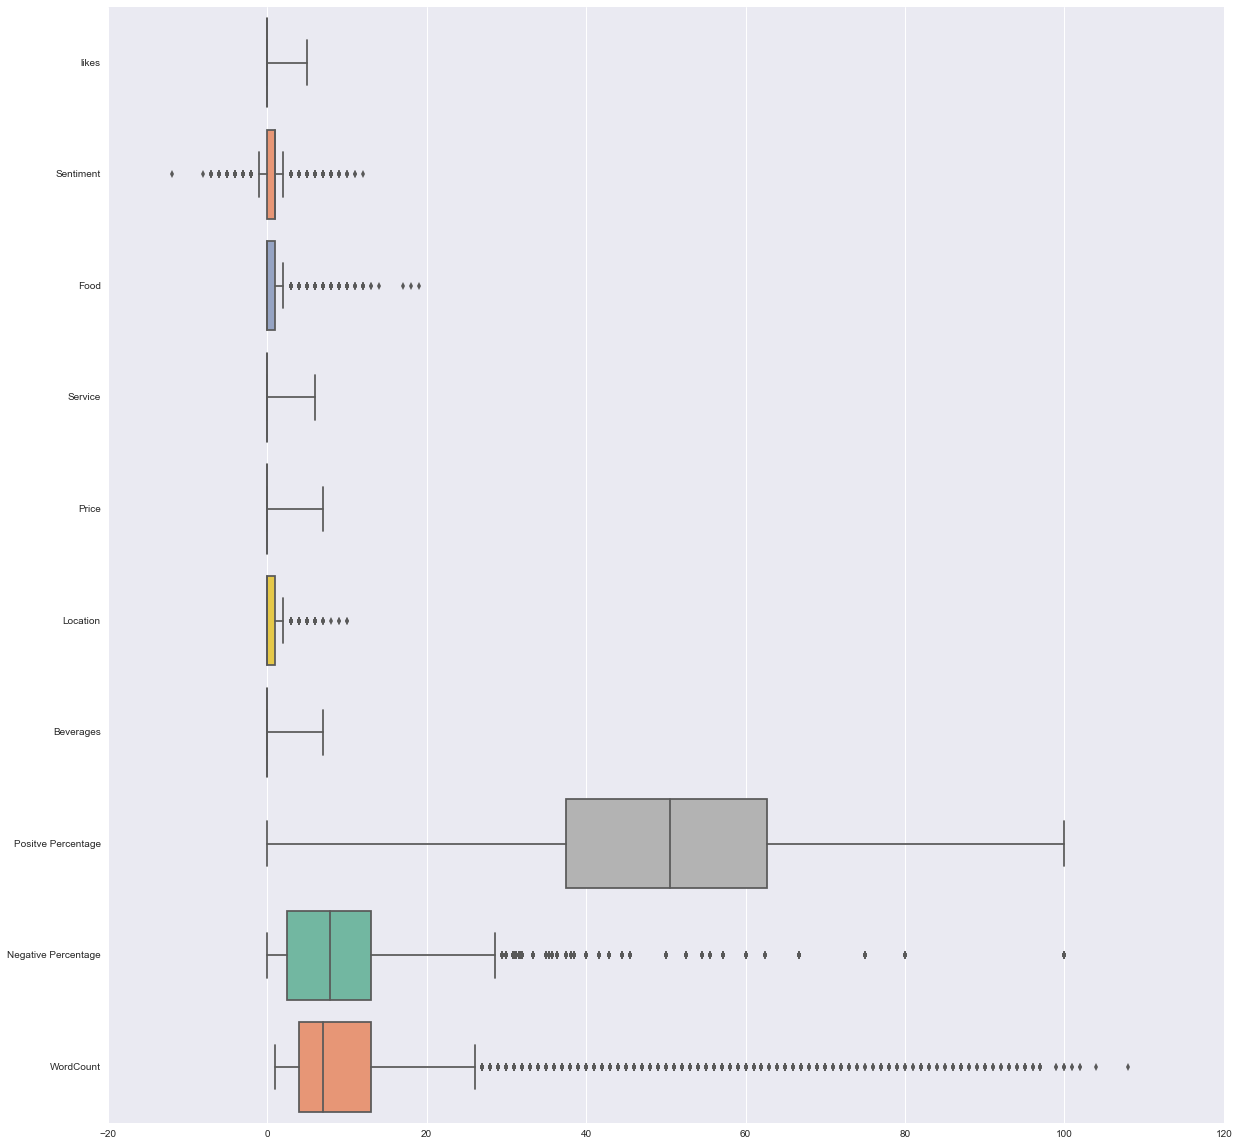

In [32]:
plt.figure(figsize=(20, 20))
ax = sns.boxplot(data=tipsDF, orient="h", palette="Set2")
plt.show()

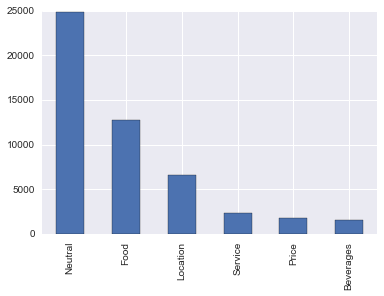

In [33]:
#Plot business and tips focus
# tips Focus bar plot
tips_focus_plot = tipsDF['Tip_Focus'].value_counts().plot(kind='bar')
plt.savefig('Text_Analysis/tips_focus_descriptive_plots.png')

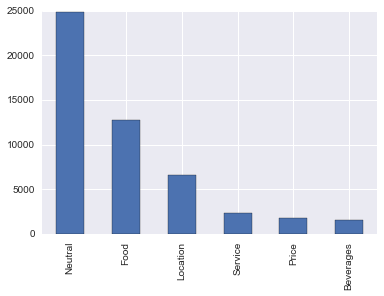

In [34]:
# Business Focus bar plot
business_focus_plot = tipsDF['Tip_Focus'].value_counts().plot(kind='bar')
plt.savefig('Text_Analysis/business_focus_descriptive_plots.png')

### What do tips focu on excluding neutral?

In [35]:
#Get total number of rows for each factor and set to variable
total_rows = len(tipsDF)
# Get number of rows where location is a focus
location_rows = tipsDF[tipsDF['Tip_Focus'] == 'Location']
location_rows_number = len(location_rows)
food_rows = tipsDF[tipsDF['Tip_Focus'] == 'Food']
food_rows_number = len(food_rows)
service_rows = tipsDF[tipsDF['Tip_Focus'] == 'Service']
service_rows_number = len(service_rows)
price_rows = tipsDF[tipsDF['Tip_Focus'] == 'Price']
price_rows_number = len(price_rows)
beverages_rows = tipsDF[tipsDF['Tip_Focus'] == 'Beverages']
beverages_rows_number = len(beverages_rows)

In [36]:
#Calculate percentage of rows
# Location
percentage_location = (location_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on location, a percentage of ' + 
      str(percentage_location) +"%")
# Food
percentage_food = (food_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(food_rows_number) + ' focus on food, a percentage of ' + 
      str(percentage_food) +"%")
# Service
percentage_service = (service_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on service, a percentage of ' + 
      str(percentage_service) +"%")
# Price
percentage_price = (price_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(price_rows_number) + ' focus on price, a percentage of ' + 
      str(percentage_price) +"%")
# Beverages
percentage_beverages = (beverages_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on location, a percentage of ' + 
      str(percentage_beverages) +"%")

Out of 50000 total rows 6598 focus on location, a percentage of 13.196%
Out of 50000 total rows 12767 focus on food, a percentage of 25.534000000000002%
Out of 50000 total rows 6598 focus on service, a percentage of 4.7379999999999995%
Out of 50000 total rows 1769 focus on price, a percentage of 3.5380000000000003%
Out of 50000 total rows 6598 focus on location, a percentage of 3.2%


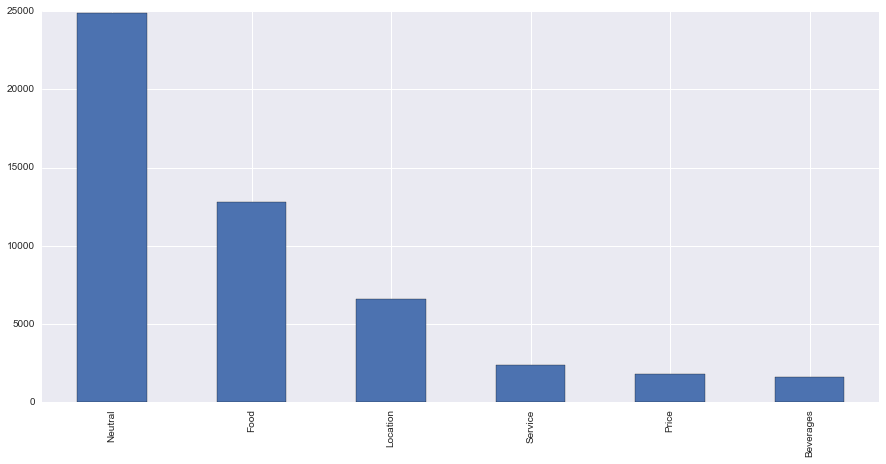

In [37]:
#Tips focus
tipsDF['Tip_Focus'].value_counts().plot(kind = 'bar', figsize=(15, 7))

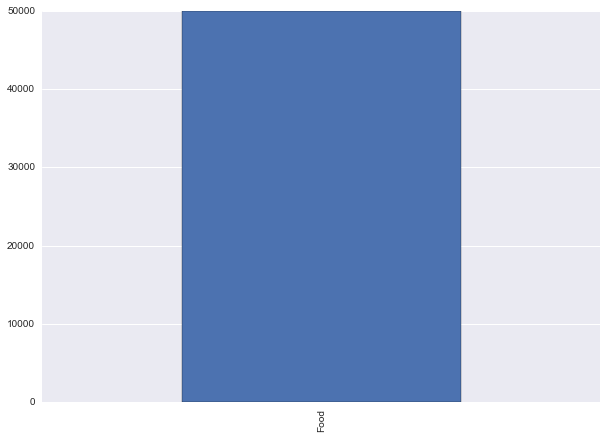

In [38]:
#Food focus
tipsDF['Business_Focus'].value_counts().plot(kind = 'bar', figsize=(10, 7))

In [39]:
# Location
location_mention = tipsDF[tipsDF['Location'] > 0]
location_mention_number = len(location_mention)
print('Location was mentioned in ' + str(location_mention_number) + ' tips, which is ' + str(((location_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Price
price_mention = tipsDF[tipsDF['Price'] > 0]
price_mention_number = len(price_mention)
print('Price was mentioned in ' + str(price_mention_number) + ' tips, which is ' + str(((price_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Service
service_mention = tipsDF[tipsDF['Service'] > 0]
service_mention_number = len(service_mention)
print('Service was mentioned in ' + str(location_mention_number) + ' tips, which is ' + str(((service_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Beverages
drink_mention = tipsDF[tipsDF['Beverages'] > 0]
drink_mention_number = len(drink_mention)
print('Beverages was mentioned in ' + str(drink_mention_number) + ' tips, which is ' + str(((drink_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Food
food_mention = tipsDF[tipsDF['Food'] > 0]
food_mention_number = len(food_mention)
print('Food was mentioned in ' + str(location_mention_number) + ' tips, which is ' + str(((food_mention_number/total_rows) * 100))
      + '% of the sample size\n')

Location was mentioned in 13850 tips, which is 27.700000000000003% of the sample size

Price was mentioned in 5414 tips, which is 10.828% of the sample size

Service was mentioned in 13850 tips, which is 12.434000000000001% of the sample size

Beverages was mentioned in 5791 tips, which is 11.582% of the sample size

Food was mentioned in 13850 tips, which is 39.153999999999996% of the sample size



Based on the above analysis, the following factors feature most prominently in tips. Food at 25%. It is also the factor which is most prominent for all the businesses. If the tips which a business recieves are not mostly about food, then they are an outliers amongst other businesses. This could be possibly due to unnoteworthy food or that another aspect of their business such as prices is particularly noteworthy. The other factors are mentioned in the following descending order, Location, service, price and beverages are factors which are 

### Out of the tips how many are positive/negative?

In [40]:
#  positive tips
positive_rows = tipsDF[tipsDF['Sentiment'] > 0 ]
positive_rows_num = positive_rows.shape[0]
print('Number of positive reviews ' +str(positive_rows_num))
print('Percentage of tips which are positive ' + str((positive_rows_num/total_rows)*100) + '%')

#Negative tips
negative_rows = tipsDF[tipsDF['Sentiment'] < 0]
negative_rows_num = negative_rows.shape[0]
print('\nNumber of negative tips ' + str(negative_rows_num))
print('Percentage of tips which are negative ' + str((negative_rows_num/total_rows) * 100) + '%')

#Neutral responses
neutral_rows = tipsDF[tipsDF['Sentiment'] == 0]
neutral_rows_num = neutral_rows.shape[0]
print('\nNumber of neutral tips ' + str(neutral_rows_num))
print('Percentage of tips which are neutral ' + str((neutral_rows_num/total_rows) * 100) + '%')

Number of positive reviews 25252
Percentage of tips which are positive 50.504000000000005%

Number of negative tips 5146
Percentage of tips which are negative 10.292%

Number of neutral tips 19602
Percentage of tips which are neutral 39.204%


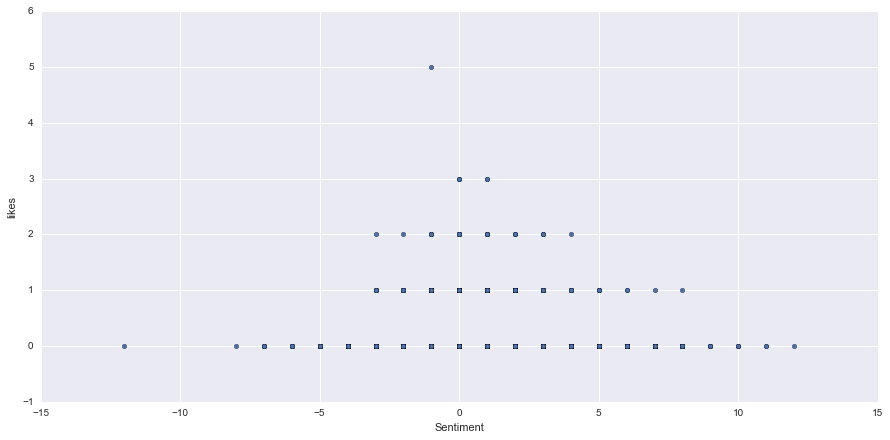

In [41]:
# Plot sentiment against likes and wordcount to see if there is correlation 
tipsDF.plot.scatter(x='Sentiment', y='likes', figsize = (15,7))

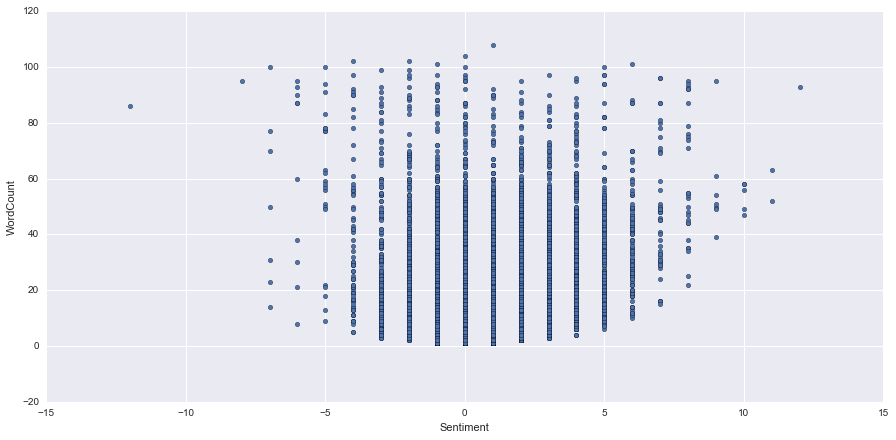

In [42]:
tipsDF.plot.scatter(x='Sentiment', y='WordCount', figsize = (15,7))

Based off the above scatterplots there does not seem to be significant correlation between a tips sentiment and its length. There also does not seem to be significant correlation between the number of likes and tips sentiment. Half of the tips are positive with only a small minority being negative. This supports the initial conclusion based on text analysis that yelp reviews are positive in nature

### Are tips which mention certain factors long or short, positive of negative?

In [43]:
#Get short tips
short_tips = tipsDF[tipsDF['WordCount'] > 5]
short_tips_no = len(short_tips)
#Long 
long_tips = tipsDF[tipsDF['WordCount'] <= 5]
long_tips_no = len(long_tips)

# Location
location_short_rows = short_tips[short_tips['Tip_Focus'] == 'Location']
location_short_rows_no = len(location_short_rows)
print('Number of shorts tips were location is mentioned prominently ' + str(location_short_rows_no) + " out of "  + str(short_tips_no) +" tips")
print('This makes up ' + str(((location_short_rows_no/short_tips_no) * 100)) + '% of the short rows')

location_long_rows = long_tips[long_tips['Tip_Focus'] == 'Location']
location_long_rows_no = len(location_long_rows)
print('Number of long tips were location is mentioned prominently ' + str(location_long_rows_no) + " out of "  + str(long_tips_no) +" tips")
print('This makes up ' + str(((location_long_rows_no/long_tips_no) * 100)) + '% of the long rows\n\n')

# Service
service_short_rows = short_tips[short_tips['Tip_Focus'] == 'Service']
service_short_rows_no = len(service_short_rows)
print('Number of shorts tips were service is mentioned prominently ' + str(service_short_rows_no) + " out of "  + str(short_tips_no) +" tips")
print('This makes up ' + str(((service_short_rows_no/short_tips_no) * 100)) + '% of the short rows')

service_long_rows = long_tips[long_tips['Tip_Focus'] == 'Service']
service_long_rows_no = len(service_long_rows)
print('Number of long tips were service is mentioned prominently ' + str(service_long_rows_no) + " out of "  + str(long_tips_no) +" tips")
print('This makes up ' + str(((service_long_rows_no/long_tips_no) * 100)) + '% of the long rows\n\n')

# Price
price_short_rows = short_tips[short_tips['Tip_Focus'] == 'Price']
price_short_rows_no = len(price_short_rows)
print('Number of shorts tips were price is mentioned prominently ' + str(price_short_rows_no) + " out of "  + str(short_tips_no) +" tips")
print('This makes up ' + str(((price_short_rows_no/short_tips_no) * 100)) + '% of the short rows')

price_long_rows = long_tips[long_tips['Tip_Focus'] == 'Price']
price_long_rows_no = len(price_long_rows)
print('Number of long tips were price is mentioned prominently ' + str(price_long_rows_no) + " out of "  + str(long_tips_no) +" tips")
print('This makes up ' + str(((price_long_rows_no/long_tips_no) * 100)) + '% of the long rows\n\n')

# Beverages
drinks_short_rows = short_tips[short_tips['Tip_Focus'] == 'Beverages']
drinks_short_rows_no = len(drinks_short_rows)
print('Number of shorts tips were beverages is mentioned prominently ' + str(drinks_short_rows_no) + " out of "  + str(short_tips_no) +" tips")
print('This makes up ' + str(((drinks_short_rows_no/short_tips_no) * 100)) + '% of the short rows')

drinks_long_rows = long_tips[long_tips['Tip_Focus'] == 'Beverages']
drinks_long_rows_no = len(drinks_long_rows)
print('Number of long tips were location is mentioned prominently ' + str(drinks_long_rows_no) + " out of "  + str(long_tips_no) +" tips")
print('This makes up ' + str(((location_long_rows_no/long_tips_no) * 100)) + '% of the long rows\n\n')

# Food
food_short_rows = short_tips[short_tips['Tip_Focus'] == 'Food']
food_short_rows_no = len(food_short_rows)
print('Number of shorts tips were food is mentioned prominently ' + str(food_short_rows_no) + " out of "  + str(short_tips_no) +" tips")
print('This makes up ' + str(((location_short_rows_no/short_tips_no) * 100)) + '% of the short rows')

food_long_rows = long_tips[long_tips['Tip_Focus'] == 'Food']
food_long_rows_no = len(food_long_rows)
print('Number of long tips were food is mentioned prominently ' + str(food_long_rows_no) + " out of "  + str(long_tips_no) +" tips")
print('This makes up ' + str(((location_long_rows_no/long_tips_no) * 100)) + '% of the long rows\n\n')

Number of shorts tips were location is mentioned prominently 5044 out of 31432 tips
This makes up 16.047340290150167% of the short rows
Number of long tips were location is mentioned prominently 1554 out of 18568 tips
This makes up 8.369237397673416% of the long rows


Number of shorts tips were service is mentioned prominently 1771 out of 31432 tips
This makes up 5.634385339781114% of the short rows
Number of long tips were service is mentioned prominently 598 out of 18568 tips
This makes up 3.220594571305472% of the long rows


Number of shorts tips were price is mentioned prominently 1363 out of 31432 tips
This makes up 4.336345125986256% of the short rows
Number of long tips were price is mentioned prominently 406 out of 18568 tips
This makes up 2.186557518311073% of the long rows


Number of shorts tips were beverages is mentioned prominently 1200 out of 31432 tips
This makes up 3.8177653346907614% of the short rows
Number of long tips were location is mentioned prominently 400 ou

Based on the above there does not seem to be any significant relation between a tips length and whether it is positive or negative

### Are tips were a certain factor is mentioned primarily negative or positive

In [44]:
# Location
location_positive = positive_rows[positive_rows['Tip_Focus'] == 'Location']
location_positive_no = len(location_positive)
print('Location was mentioned positively in ' + str(location_positive_no) + ' tips, which is ' + str(((location_positive_no/location_rows_number) * 100))
      + '% of the sample size')

location_negative = negative_rows[negative_rows['Tip_Focus'] == 'Location']
location_negative_no = len(location_negative)
print('Location was mentioned negatively in ' + str(location_negative_no) + ' tips, which is ' + str(((location_negative_no/location_rows_number) * 100))
      + '% of the sample size')

location_neutral = neutral_rows[neutral_rows['Tip_Focus'] == 'Location']
location_neutral_no = len(location_neutral)
print('Location was mentioned neutrally in ' + str(location_neutral_no) + ' tips, which is ' + str(((location_neutral_no/location_rows_number) * 100))
      + '% of the sample size\n')

# Food
food_positive = positive_rows[positive_rows['Tip_Focus'] == 'Food']
food_positive_no = len(food_positive)
print('Food was mentioned positively in ' + str(food_positive_no) + ' tips, which is ' + str(((food_positive_no/food_rows_number) * 100))
      + '% of the sample size')

food_negative = negative_rows[negative_rows['Tip_Focus'] == 'Food']
food_negative_no = len(food_negative)
print('Food was mentioned negatively in ' + str(food_negative_no) + ' tips, which is ' + str(((food_negative_no/food_rows_number) * 100))
      + '% of the sample size')

food_neutral = neutral_rows[neutral_rows['Tip_Focus'] == 'Food']
food_neutral_no = len(food_neutral)
print('Food was mentioned neutrally in ' + str(food_neutral_no) + ' tips, which is ' + str(((food_neutral_no/food_rows_number) * 100))
      + '% of the sample size\n')

# Price
price_positive = positive_rows[positive_rows['Tip_Focus'] == 'Price']
price_positive_no = len(price_positive)
print('Price was mentioned positively in ' + str(location_positive_no) + ' tips, which is ' + str(((price_positive_no/price_rows_number) * 100))
      + '% of the sample size')

price_negative = negative_rows[negative_rows['Tip_Focus'] == 'Price']
price_negative_no = len(price_negative)
print('Price was mentioned negatively in ' + str(location_negative_no) + ' tips, which is ' + str(((price_negative_no/price_rows_number) * 100))
      + '% of the sample size')

price_neutral = neutral_rows[neutral_rows['Tip_Focus'] == 'Price']
price_neutral_no = len(price_neutral)
print('Price was mentioned neutrally in ' + str(price_neutral_no) + ' tips, which is ' + str(((price_neutral_no/price_rows_number) * 100))
      + '% of the sample size\n')

# Service
service_positive = positive_rows[positive_rows['Tip_Focus'] == 'Service']
service_positive_no = len(service_positive)
print('Service was mentioned positively in ' + str(service_positive_no) + ' tips, which is ' + str(((service_positive_no/service_rows_number) * 100))
      + '% of the sample size')

service_negative = negative_rows[negative_rows['Tip_Focus'] == 'Service']
service_negative_no = len(service_negative)
print('Service was mentioned negatively in ' + str(service_negative_no) + ' tips, which is ' + str(((service_negative_no/service_rows_number) * 100))
      + '% of the sample size')

service_neutral = neutral_rows[neutral_rows['Tip_Focus'] == 'Service']
service_neutral_no = len(service_neutral)
print('Service was mentioned neutrally in ' + str(service_neutral_no) + ' tips, which is ' + str(((service_neutral_no/service_rows_number) * 100))
      + '% of the sample size\n')

# Beverages
drinks_positive = positive_rows[positive_rows['Tip_Focus'] == 'Beverages']
drinks_positive_no = len(drinks_positive)
print('Beverages was mentioned positively in ' + str(drinks_positive_no) + ' tips, which is ' + str(((drinks_positive_no/beverages_rows_number) * 100))
      + '% of the sample size')

drinks_negative = negative_rows[negative_rows['Tip_Focus'] == 'Beverages']
drinks_negative_no = len(location_negative)
print('Beverages was mentioned negatively in ' + str(drinks_negative_no) + ' tips, which is ' + str(((drinks_negative_no/beverages_rows_number) * 100))
      + '% of the sample size')

drinks_neutral = neutral_rows[neutral_rows['Tip_Focus'] == 'Beverages']
drinks_neutral_no = len(drinks_neutral)
print('Beverages was mentioned neutrally in ' + str(drinks_neutral_no) + ' tips, which is ' + str(((drinks_neutral_no/beverages_rows_number) * 100))
      + '% of the sample size\n')

Location was mentioned positively in 3501 tips, which is 53.06153379812064% of the sample size
Location was mentioned negatively in 879 tips, which is 13.322218854198242% of the sample size
Location was mentioned neutrally in 2218 tips, which is 33.61624734768112% of the sample size

Food was mentioned positively in 7333 tips, which is 57.43714263335161% of the sample size
Food was mentioned negatively in 1039 tips, which is 8.138168716221509% of the sample size
Food was mentioned neutrally in 4395 tips, which is 34.42468865042688% of the sample size

Price was mentioned positively in 3501 tips, which is 42.057659694742796% of the sample size
Price was mentioned negatively in 879 tips, which is 13.397399660825323% of the sample size
Price was mentioned neutrally in 788 tips, which is 44.54494064443188% of the sample size

Service was mentioned positively in 1543 tips, which is 65.1329674968341% of the sample size
Service was mentioned negatively in 482 tips, which is 20.34613761080625%

Only beverages is mentioned in more negative tips and it is difficult to conclude if this is concidence or a statistical pattern. Comparison with reviews may reveal more

# Yelp Merged Dataset Analysis

## Overall analysis on review text using nltk

In [45]:
# Open the file used to store the tips and feed it to dataframe
with open('text_preparation/reviews.txt', 'r') as file:
    reviews_text= file.read()

In [46]:
#Tokenise text
review_words = nltk.word_tokenize(reviews_text)
reviews_text_word = nltk.Text(review_words)

In [47]:
#Tidy up text
reviews_text_word = [w.lower() for w in reviews_text_word] 
reviews_text_word = [w for w in reviews_text_word if not w in stop]
reviews_text_word = [w for w in reviews_text_word if len(w) > 2]

In [48]:
# Custom stop wordlist to remove stopwords and other common words which aren't very informative
reviews_text_word = [w for w in reviews_text_word if not w in stopwords_custom]

In [49]:
# Calculate the most frequent words
word_frequency_reviews = nltk.FreqDist(reviews_text_word)
print("\nMost frequent 100 words(excluding stopwords) before used by Yelp users when leaving a review were ",word_frequency_reviews.most_common(100))


Most frequent 100 words(excluding stopwords) before used by Yelp users when leaving a review were  [('food', 20996), ('good', 18427), ('place', 16031), ('great', 12224), ('like', 10697), ('service', 9373), ('would', 8308), ('time', 8128), ('really', 7638), ('back', 7341), ('restaurant', 6056), ('ordered', 5962), ('chicken', 5934), ('best', 5827), ('also', 5805), ('menu', 5209), ('order', 5142), ('nice', 4895), ('little', 4787), ('well', 4728), ('cheese', 4704), ('love', 4663), ('even', 4642), ('sauce', 4640), ('delicious', 4601), ('lunch', 4531), ('could', 4476), ('bar', 4406), ('pretty', 4338), ('try', 4312), ('came', 4056), ('salad', 3937), ('much', 3921), ('meal', 3913), ('went', 3846), ('eat', 3699), ('pizza', 3688), ('first', 3643), ('people', 3551), ('better', 3486), ('friendly', 3420), ('dinner', 3419), ('table', 3416), ('definitely', 3390), ('night', 3357), ('wait', 3279), ('two', 3276), ('staff', 3260), ('sandwich', 3205), ('know', 3199), ('think', 3196), ('fresh', 3164), ('m

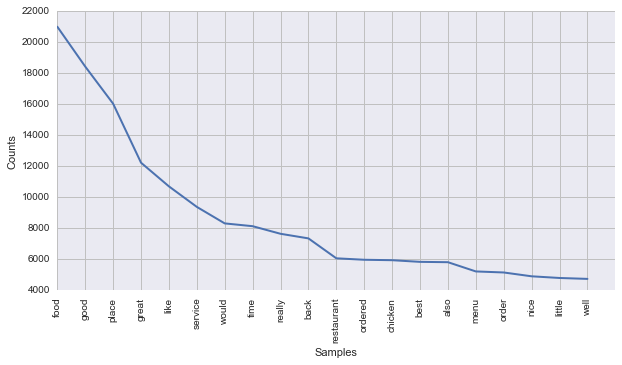

In [50]:
# Plot the most frequent 20 words
fig = plt.figure(figsize=(10, 5)) 
word_frequency_reviews.plot(20,cumulative=False, )
plt.savefig('Text_Analysis/reviews_top_20_words.png')
plt.show()

Similar to tips, for reviews it can be noted that again the majority of descriptive words are positive in nature although again this does not account for descriptive words with negative preface.  The factors; food, service, location, price and drinks are all being mentioned with food the most prominent.

In [51]:
# There were the following unique words
print('There are ' + str(len(set(reviews_text_word))) + ' unique words in the dataset')

There are 45656 unique words in the dataset


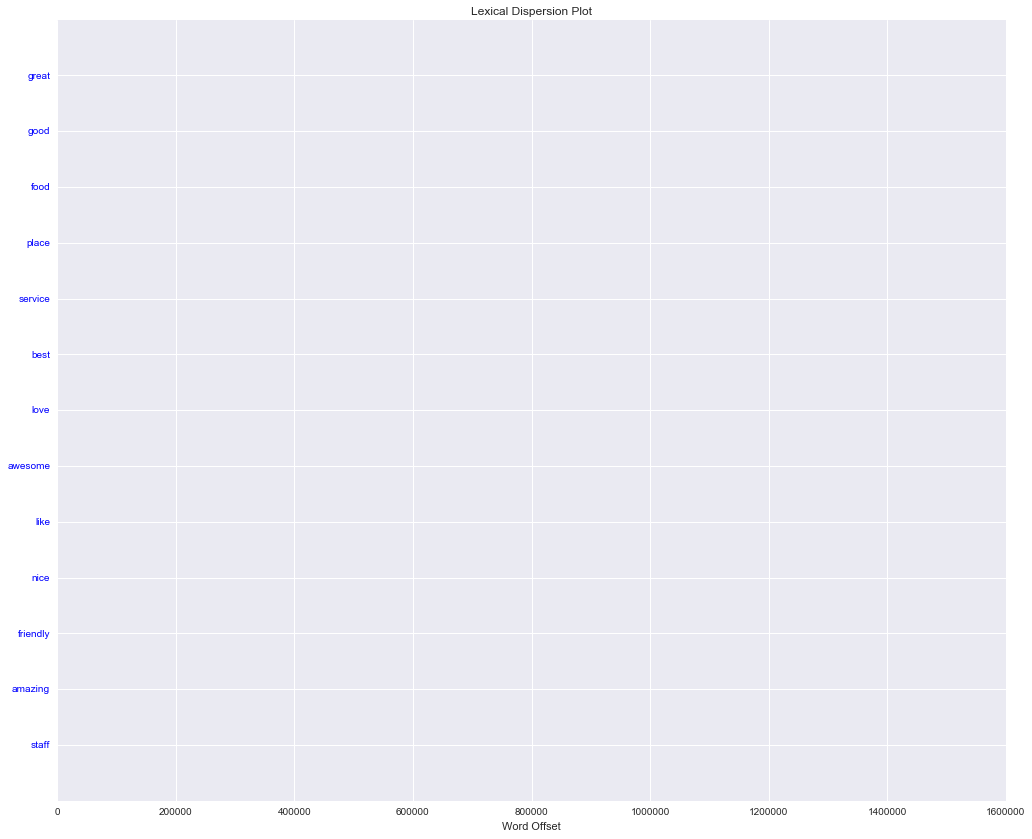

In [52]:
Review_text = nltk.Text(reviews_text_word )
fig = plt.figure(figsize=(17, 14)) 
Review_text.dispersion_plot(['great', 'good', 'food', 'place', 'service','best','love','awesome','like','nice',
                                'friendly','amazing', 'staff',])
plt.savefig('top_20_words_dispersion.png')
plt.show()

### Cell by Cell analysis

In [53]:
abtDF_master =pd.read_csv('text_preparation/abt_text_analysis_with_tips.csv', encoding = 'latin-1' )

In [54]:
abtDF = abtDF_master[:]

In [55]:
abtDF.head()

Unnamed: 0             business_id  \
0           0  fNGIbpazjTRdXgwRY_NIXA   
1           1  fNGIbpazjTRdXgwRY_NIXA   
2           2  fNGIbpazjTRdXgwRY_NIXA   
3           3  fNGIbpazjTRdXgwRY_NIXA   
4           4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', '

The following features are selected as it they are features which are likely to have correlation with the text of the review

In [56]:
# Select rows
abtDF =abtDF[['neighborhoods', 'Business stars', 'Accepts Credit Cards', 'Alcohol', 'Attire', 
                     'Caters', 'Delivery', 'Good For Groups', 'Good for Kids', 'Has TV', 'Noise Level', 'Outdoor Seating', 
                     'Price Range', 'Take-out', 'Takes Reservations', 'Waiter Service', 'Wheelchair Accessible', 'Wi-Fi',
                     'date', 'Reviewer Rating', 'Review = cool', 'Review = funny', 'Review = useful', 'average_stars',
                     'Reviewer review count','Votes cool', 'Votes funny','Votes useful', 'Sentiment', 'Food',
                     'Service','Price','Location','Beverages','Review_Focus','Business_Focus','Positive percentage',
                     'Negative percentage','WordCount']]
abtDF.head()

neighborhoods  Business stars Accepts Credit Cards   Alcohol  Attire Caters  \
0            []             4.0                 True  full_bar  casual  False   
1            []             4.0                 True  full_bar  casual  False   
2            []             4.0                 True  full_bar  casual  False   
3            []             4.0                 True  full_bar  casual  False   
4            []             4.0                 True  full_bar  casual  False   

  Delivery Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0    False            True          True   True     average           False   
1    False            True          True   True     average           False   
2    False            True          True   True     average           False   
3    False            True          True   True     average           False   
4    False            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date  Reviewer Rating  Review = cool  \
0                  True  free  2013-09-01                2              0   
1                  True  free  2014-03-21                5              0   
2                  True  free  2014-06-08                5              0   
3                  True  free  2014-07-24                4              0   
4                  True  free  2015-01-06                5              0   

   Review = funny  Review = useful  average_stars  Reviewer review count  \
0               0                0           3.52                    118   
1               0                0           4.63                     45   
2               0                0           4.00                      3   
3               0                0           3.50                      2   
4               0                1           4.38                     26   

   Votes cool  Votes funny  Votes useful  Sentiment  Food  Service  Price  \
0         162          195           457          8    45        7      3   
1          40            5            65          3     6        0      0   
2           0            0             0          8    11        4      1   
3           0            0             6          2    18        0      0   
4           0            1            10          3     3        0      1   

   Location  Beverages Review_Focus Business_Focus  Positive percentage  \
0        16          3         Food           Food                100.0   
1         2          0         Food           Food                100.0   
2        10          2         Food           Food                100.0   
3         4          1         Food           Food                100.0   
4         3          1      Neutral           Food                100.0   

   Negative percentage  WordCount  
0                  0.0        642  
1                  0.0         47  
2                  0.0        215  
3                  0.0        146  
4                  0.0         44

In [57]:
#Get amount of rows and features in ABT reviews csv
print('Number of rows and features', abtDF.shape)

Number of rows and features (25924, 39)


In [58]:
#Get types of features in ABT reviews csv
print('Feature Types')
print(abtDF.dtypes)

Feature Types
neighborhoods             object
Business stars           float64
Accepts Credit Cards        bool
Alcohol                   object
Attire                    object
Caters                      bool
Delivery                    bool
Good For Groups             bool
Good for Kids               bool
Has TV                      bool
Noise Level               object
Outdoor Seating             bool
Price Range              float64
Take-out                    bool
Takes Reservations          bool
Waiter Service              bool
Wheelchair Accessible       bool
Wi-Fi                     object
date                      object
Reviewer Rating            int64
Review = cool              int64
Review = funny             int64
Review = useful            int64
average_stars            float64
Reviewer review count      int64
Votes cool                 int64
Votes funny                int64
Votes useful               int64
Sentiment                  int64
Food                       in

In [59]:
# Check for null values
print('Number of missing values')
print(abtDF.isnull().sum())

Number of missing values
neighborhoods            0
Business stars           0
Accepts Credit Cards     0
Alcohol                  0
Attire                   0
Caters                   0
Delivery                 0
Good For Groups          0
Good for Kids            0
Has TV                   0
Noise Level              0
Outdoor Seating          0
Price Range              0
Take-out                 0
Takes Reservations       0
Waiter Service           0
Wheelchair Accessible    0
Wi-Fi                    0
date                     0
Reviewer Rating          0
Review = cool            0
Review = funny           0
Review = useful          0
average_stars            0
Reviewer review count    0
Votes cool               0
Votes funny              0
Votes useful             0
Sentiment                0
Food                     0
Service                  0
Price                    0
Location                 0
Beverages                0
Review_Focus             0
Business_Focus           0
Pos

In [60]:
#Overall numerical analysis
print(abtDF.describe())
contionous_features_abt_statistics = abtDF.describe()
contionous_features_abt_statistics.to_csv('Text_Analysis/abt_reviews_statistics.csv')

       Business stars   Price Range  Reviewer Rating  Review = cool  \
count    25924.000000  25924.000000     25924.000000   25924.000000   
mean         3.683594      1.800764         3.694144       0.472072   
std          0.525217      0.636491         1.250450       1.425499   
min          1.500000      1.000000         1.000000       0.000000   
25%          3.500000      1.000000         3.000000       0.000000   
50%          4.000000      2.000000         4.000000       0.000000   
75%          4.000000      2.000000         5.000000       0.000000   
max          5.000000      4.000000         5.000000      73.000000   

       Review = funny  Review = useful  average_stars  Reviewer review count  \
count    25924.000000     25924.000000   25924.000000           25924.000000   
mean         0.383081         0.891761       3.725373             131.042007   
std          1.346365         1.765222       0.644199             289.557908   
min          0.000000         0.000000  

### Continous

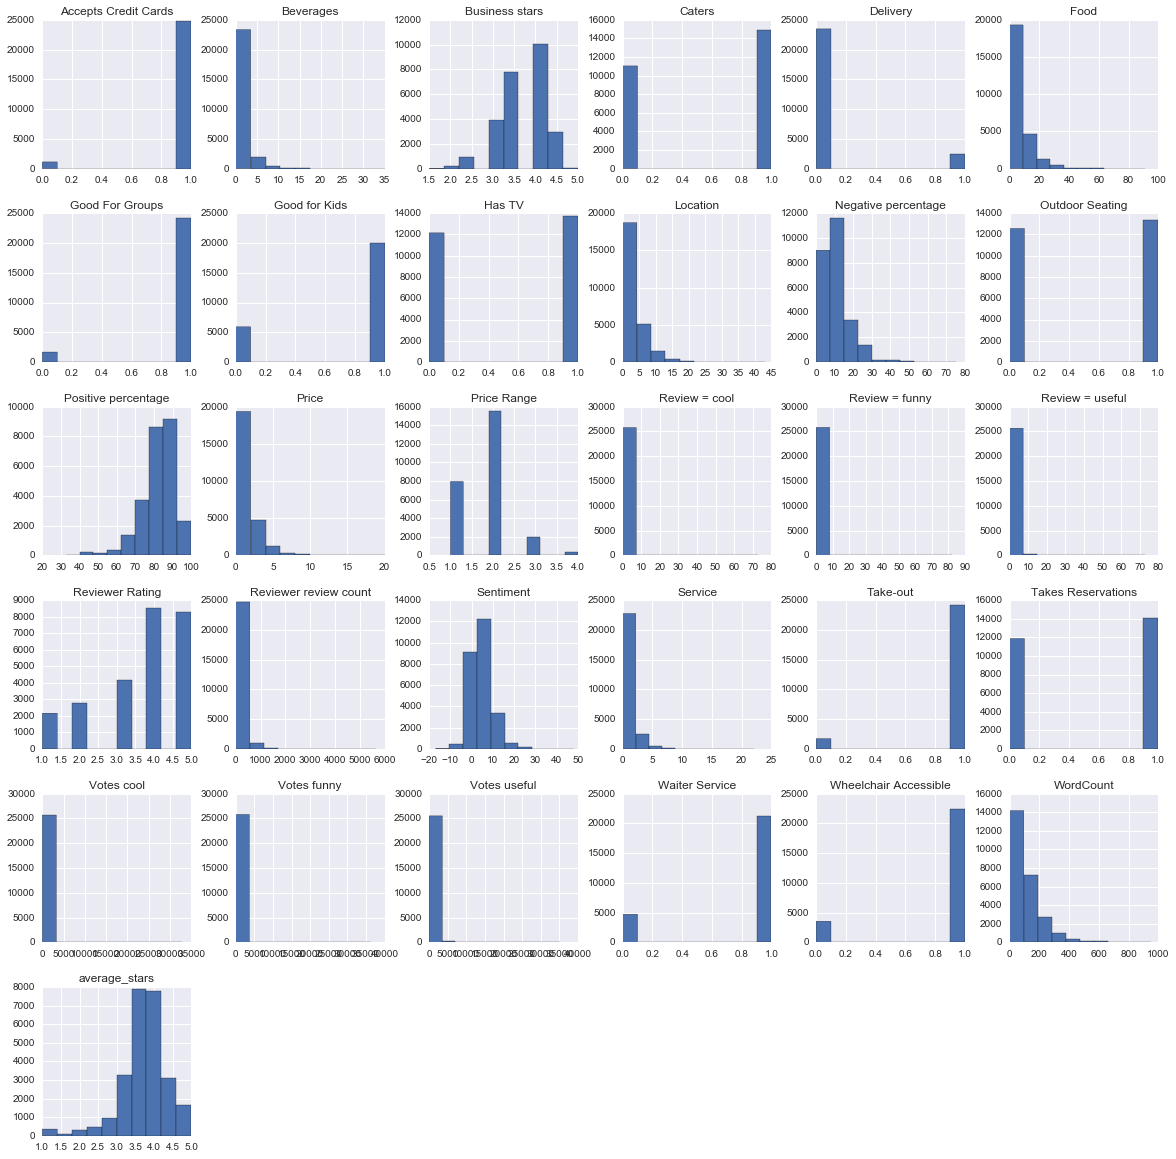

In [61]:
# Plot out contionous features in order to see if there is significant mention of location and save them
abtDF.hist(figsize=(20, 20))
plt.savefig('Text_Analysis/abt_reviews_histograms.png')

In [62]:
# Check the correlations between the contionous features
print("Correlation of contionous features")
#print(abtDF.corr())
abtDF.corr()

Correlation of contionous features


Business stars  Accepts Credit Cards    Caters  \
Business stars               1.000000             -0.061727 -0.008734   
Accepts Credit Cards        -0.061727              1.000000  0.177684   
Caters                      -0.008734              0.177684  1.000000   
Delivery                    -0.127130              0.068742  0.116362   
Good For Groups             -0.125978              0.055763  0.033959   
Good for Kids               -0.012948             -0.044017  0.070549   
Has TV                      -0.211004              0.051341  0.030929   
Outdoor Seating             -0.054504              0.097310  0.003786   
Price Range                 -0.011797              0.221437  0.124729   
Take-out                    -0.126866              0.001422  0.054375   
Takes Reservations          -0.123828              0.189400  0.182766   
Waiter Service              -0.094253             -0.014549 -0.029023   
Wheelchair Accessible       -0.170264              0.143611  0.138268   
Reviewer Rating              0.381655             -0.017989 -0.004576   
Review = cool                0.039528              0.004754  0.006962   
Review = funny              -0.009834              0.012972  0.001961   
Review = useful              0.022413              0.006854  0.008403   
average_stars                0.177129             -0.010633 -0.005838   
Reviewer review count       -0.020262              0.003821  0.004169   
Votes cool                  -0.005226              0.010502  0.012960   
Votes funny                 -0.006156              0.012360  0.013904   
Votes useful                -0.006467              0.009009  0.011592   
Sentiment                    0.171478              0.005350  0.043565   
Food                         0.019375              0.006294  0.087791   
Service                     -0.020341              0.003305  0.001621   
Price                       -0.012401             -0.033510  0.004187   
Location                     0.018114              0.004218  0.017379   
Beverages                   -0.002566              0.017127 -0.034624   
Positive percentage          0.780203             -0.008879  0.074218   
Negative percentage         -0.770037              0.061188 -0.056587   
WordCount                   -0.018058              0.009847  0.029969   

                       Delivery  Good For Groups  Good for Kids    Has TV  \
Business stars        -0.127130        -0.125978      -0.012948 -0.211004   
Accepts Credit Cards   0.068742         0.055763      -0.044017  0.051341   
Caters                 0.116362         0.033959       0.070549  0.030929   
Delivery               1.000000        -0.067261       0.040158 -0.008138   
Good For Groups       -0.067261         1.000000       0.061899  0.239855   
Good for Kids          0.040158         0.061899       1.000000 -0.097124   
Has TV                -0.008138         0.239855      -0.097124  1.000000   
Outdoor Seating       -0.021082         0.017710      -0.219047  0.131853   
Price Range           -0.055809         0.139322      -0.444582  0.077009   
Take-out               0.086130        -0.070108       0.426710 -0.018754   
Takes Reservations    -0.091962         0.158647      -0.226476  0.062095   
Waiter Service        -0.207866         0.325546      -0.170523  0.149612   
Wheelchair Accessible  0.017474         0.027970       0.036011  0.104387   
Reviewer Rating       -0.052440        -0.063157      -0.011663 -0.099495   
Review = cool          0.001163        -0.026753      -0.009679 -0.018592   
Review = funny        -0.000181        -0.017806      -0.000204 -0.001848   
Review = useful        0.004838        -0.028482      -0.021028 -0.020591   
average_stars         -0.031997        -0.010189      -0.005535 -0.047476   
Reviewer review count -0.012305         0.016603      -0.007789  0.010086   
Votes cool            -0.004698         0.009917       0.007718  0.001246   
Votes funny           -0.006636         0.009161       0.010957  0.00

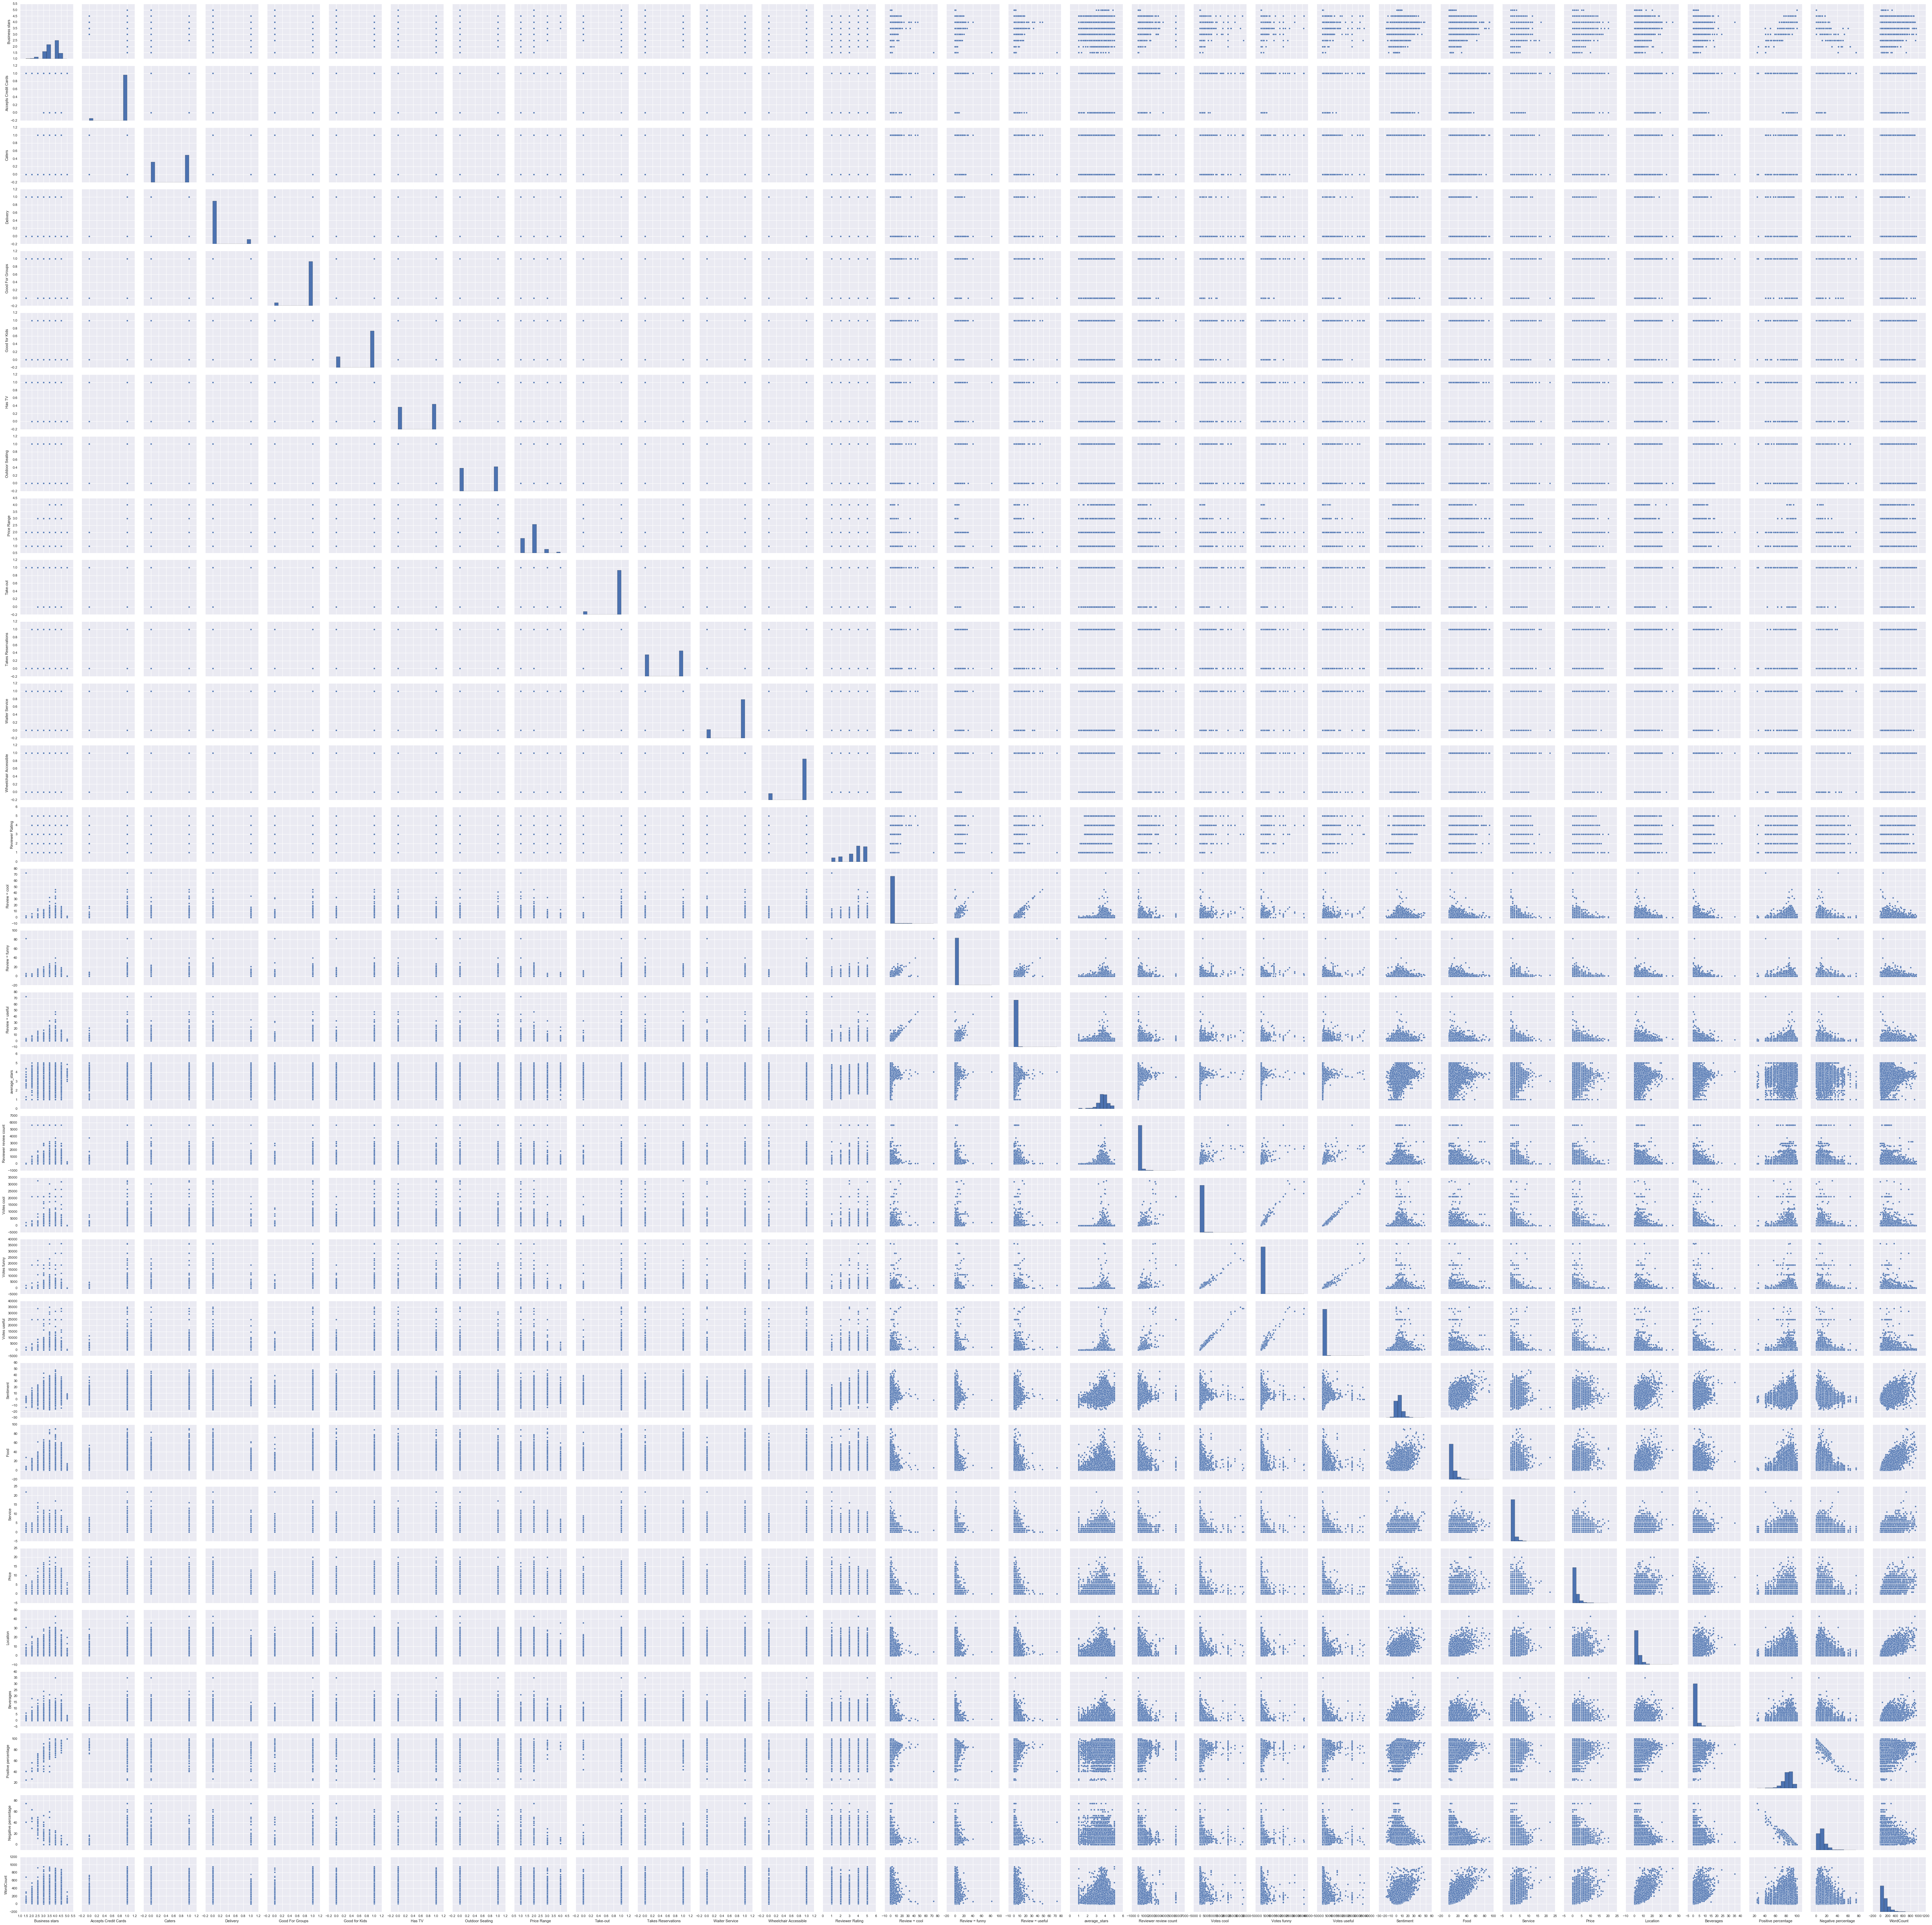

In [63]:
# Correlation matrix for the continous features
sns.pairplot(data=abtDF)
plt.savefig('Text_Analysis/initial_correlation_histograms.png')

Looking at the above correlation coefficients as well as the correlation matrix is is possible to see that some features do have a correlation. To get a better idea of this, several features are dropped and the matrix replotted

In [64]:
abtDF = abtDF_master[[ 'Review = cool', 'Review = funny', 'Review = useful', 'Sentiment', 'Food',
                     'Service','Price','Location','Beverages','Review_Focus','Business_Focus','Positive percentage',
                     'Negative percentage']]

In [65]:
# Check the correlations between the contionous features
print("Correlation of contionous features")
#print(abtDF.corr())
abtDF.corr()

Correlation of contionous features


Review = cool  Review = funny  Review = useful  \
Review = cool             1.000000        0.757788         0.826416   
Review = funny            0.757788        1.000000         0.693090   
Review = useful           0.826416        0.693090         1.000000   
Sentiment                 0.151055        0.053612         0.152168   
Food                      0.170175        0.144225         0.241007   
Service                   0.092088        0.076170         0.138798   
Price                     0.106152        0.101078         0.178724   
Location                  0.169945        0.144758         0.242450   
Beverages                 0.136638        0.118058         0.181869   
Positive percentage       0.035417       -0.021762         0.022155   
Negative percentage      -0.032380        0.020157        -0.017110   

                     Sentiment      Food   Service     Price  Location  \
Review = cool         0.151055  0.170175  0.092088  0.106152  0.169945   
Review = funny        0.053612  0.144225  0.076170  0.101078  0.144758   
Review = useful       0.152168  0.241007  0.138798  0.178724  0.242450   
Sentiment             1.000000  0.449692  0.289441  0.234568  0.414681   
Food                  0.449692  1.000000  0.364107  0.479789  0.598914   
Service               0.289441  0.364107  1.000000  0.283007  0.402229   
Price                 0.234568  0.479789  0.283007  1.000000  0.438029   
Location              0.414681  0.598914  0.402229  0.438029  1.000000   
Beverages             0.282893  0.409330  0.301034  0.352085  0.431204   
Positive percentage   0.224279  0.065991 -0.004732  0.006892  0.036046   
Negative percentage  -0.204975 -0.056974  0.014400  0.004714 -0.026086   

                     Beverages  Positive percentage  Negative percentage  
Review = cool         0.136638             0.035417            -0.032380  
Review = funny        0.118058            -0.021762             0.020157  
Review = useful       0.181869             0.022155            -0.017110  
Sentiment             0.282893             0.224279            -0.204975  
Food                  0.409330             0.065991            -0.056974  
Service               0.301034            -0.004732             0.014400  
Price                 0.352085             0.006892             0.004714  
Location              0.431204             0.036046            -0.026086  
Beverages             1.000000             0.027427            -0.006937  
Positive percentage   0.027427             1.000000            -0.937572  
Negative percentage  -0.006937            -0.937572             1.000000

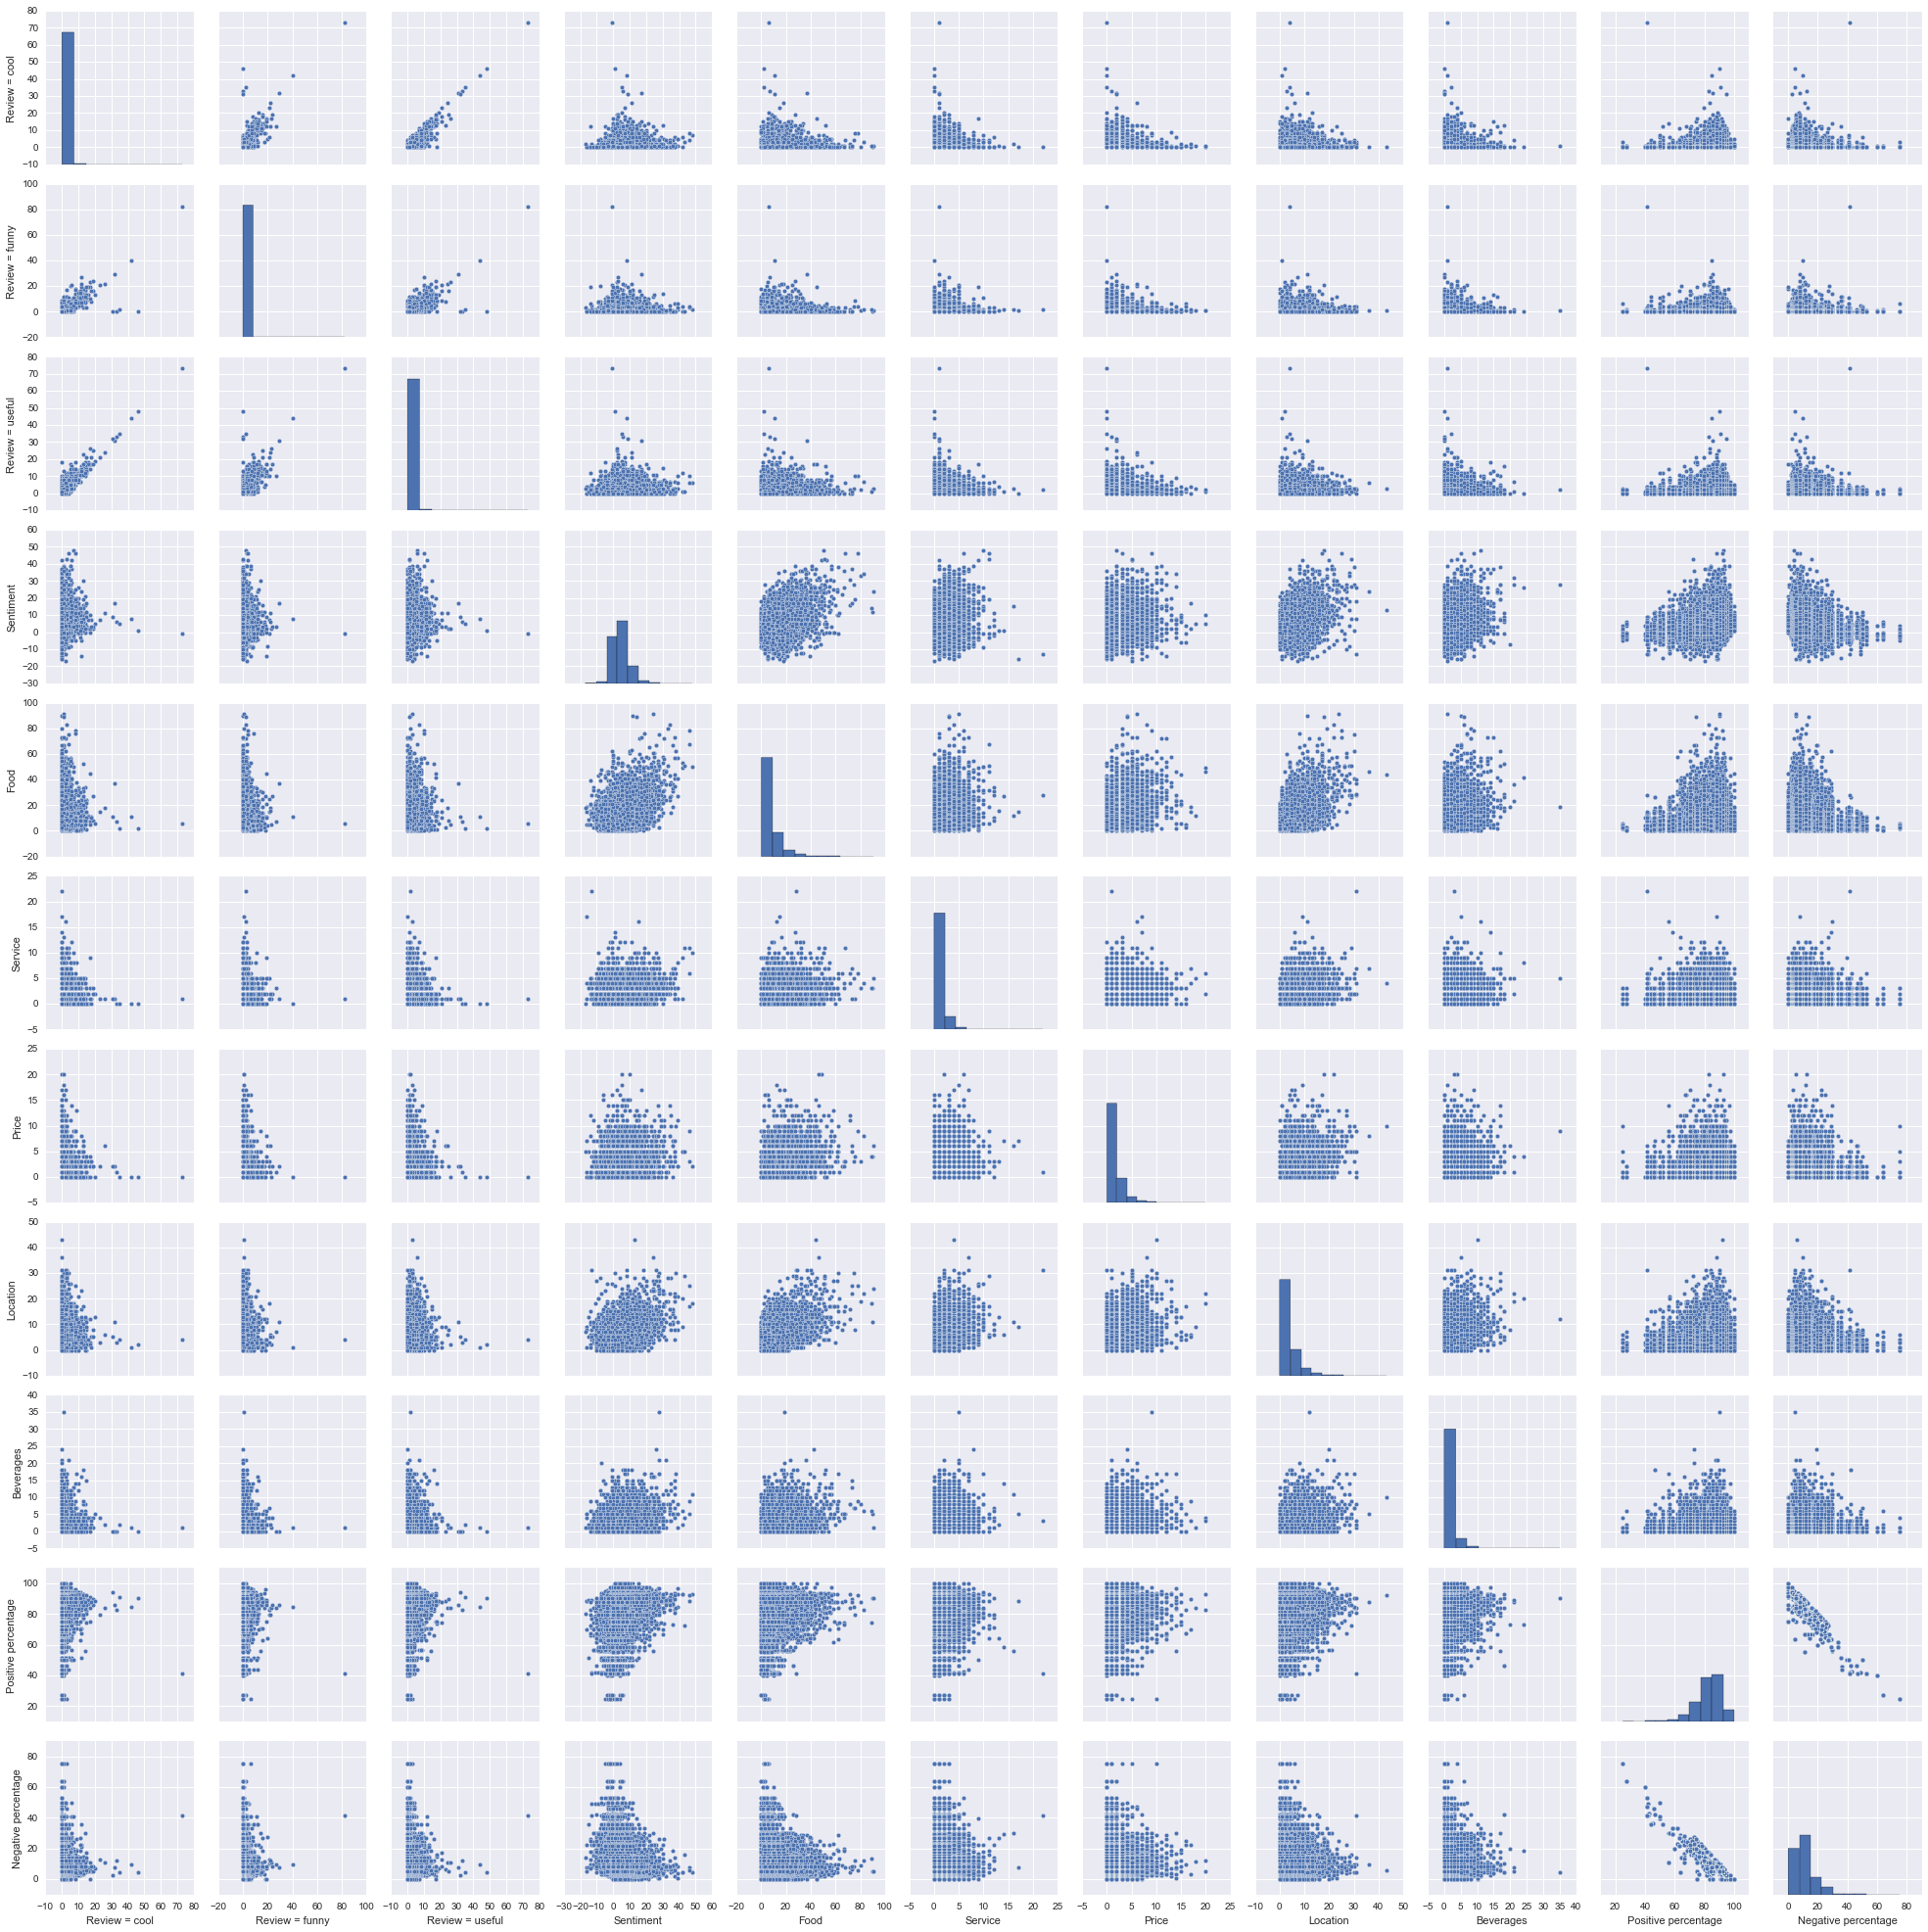

In [66]:
# Correlation matrix for the continous features
sns.pairplot(data=abtDF)
plt.savefig('Text_Analysis/second_correlation_histograms.png')

Based on the above correlation plotting there does not seem to be significant correlation between any feature based off textual analysis and other features such review is cool.

#### Categorical Features

In [67]:
# Select object columns
object_columns = abtDF.select_dtypes(['object']).columns
object_columns

Index(['Review_Focus', 'Business_Focus'], dtype='object')

In [68]:
# Convert objects to categories
for column in object_columns:
    abtDF[column] = abtDF[column].astype('category')
abtDF.dtypes  

C:\Users\ray\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Review = cool             int64
Review = funny            int64
Review = useful           int64
Sentiment                 int64
Food                      int64
Service                   int64
Price                     int64
Location                  int64
Beverages                 int64
Review_Focus           category
Business_Focus         category
Positive percentage     float64
Negative percentage     float64
dtype: object

In [69]:
#Look at the categorical features only
category_columns_review = abtDF.select_dtypes(['category']).columns
print("The following are categorical columns")
abtDF[category_columns_review]

The following are categorical columns


Review_Focus Business_Focus
0             Food           Food
1             Food           Food
2             Food           Food
3             Food           Food
4          Neutral           Food
5             Food           Food
6             Food           Food
7             Food           Food
8             Food           Food
9             Food           Food
10            Food           Food
11            Food           Food
12        Location           Food
13            Food           Food
14            Food           Food
15        Location           Food
16            Food           Food
17            Food           Food
18            Food           Food
19            Food           Food
20            Food           Food
21            Food           Food
22            Food           Food
23            Food           Food
24            Food           Food
25            Food           Food
26            Food           Food
27            Food           Food
28            Food           Food
29         Neutral           Food
...            ...            ...
25894     Location           Food
25895      Neutral           Food
25896         Food           Food
25897     Location           Food
25898     Location           Food
25899         Food           Food
25900         Food           Food
25901         Food           Food
25902         Food           Food
25903      Neutral           Food
25904      Neutral           Food
25905         Food           Food
25906         Food           Food
25907         Food           Food
25908     Location           Food
25909      Service           Food
25910         Food           Food
25911      Neutral           Food
25912         Food           Food
25913         Food           Food
25914      Neutral           Food
25915         Food           Food
25916     Location           Food
25917      Neutral           Food
25918         Food           Food
25919     Location           Food
25920         Food           Food
25921      Neutral           Food
25922     Location           Food
25923         Food           Food

[25924 rows x 2 columns]

In [70]:
#### Outliers

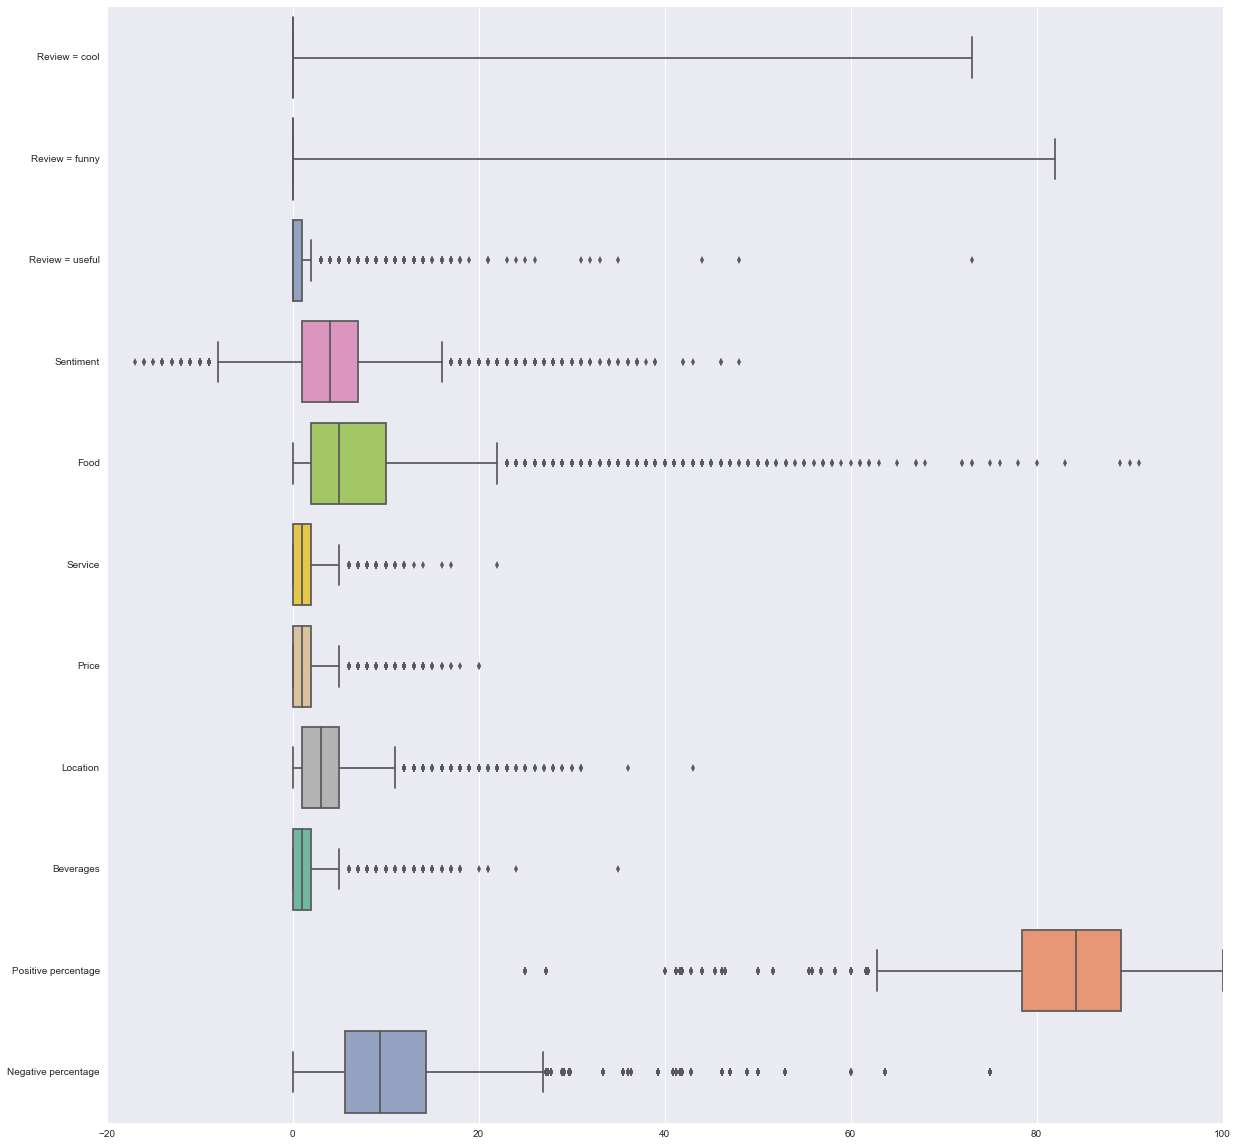

In [71]:
plt.figure(figsize=(20, 20))
ax = sns.boxplot(data=abtDF, orient="h", palette="Set2")
plt.show()

## What do reviews focus on excluding neutral?

In [72]:
#Get total number of rows for each factor and set to variable
total_rows = len(abtDF)
# Get number of rows where location is a focus
location_rows = abtDF[abtDF['Review_Focus'] == 'Location']
location_rows_number = len(location_rows)
food_rows = abtDF[abtDF['Review_Focus'] == 'Food']
food_rows_number = len(food_rows)
service_rows = abtDF[abtDF['Review_Focus'] == 'Service']
service_rows_number = len(service_rows)
price_rows = abtDF[abtDF['Review_Focus'] == 'Price']
price_rows_number = len(price_rows)
beverages_rows = abtDF[abtDF['Review_Focus'] == 'Beverages']
beverages_rows_number = len(beverages_rows)

In [73]:
#Calculate percentage of rows
# Location
percentage_location = (location_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on location, a percentage of ' + 
      str(percentage_location) +"%")
# Food
percentage_food = (food_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(food_rows_number) + ' focus on food, a percentage of ' + 
      str(percentage_food) +"%")
# Service
percentage_service = (service_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on service, a percentage of ' + 
      str(percentage_service) +"%")
# Price
percentage_price = (price_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(price_rows_number) + ' focus on price, a percentage of ' + 
      str(percentage_price) +"%")
# Beverages
percentage_beverages = (beverages_rows_number/total_rows) * 100
print('Out of '+ str(total_rows) + ' total rows ' + str(location_rows_number) + ' focus on drink, a percentage of ' + 
      str(percentage_beverages) +"%")

Out of 25924 total rows 4097 focus on location, a percentage of 15.803888288844314%
Out of 25924 total rows 16772 focus on food, a percentage of 64.69680604844932%
Out of 25924 total rows 4097 focus on service, a percentage of 1.5043974695263076%
Out of 25924 total rows 258 focus on price, a percentage of 0.9952167875327881%
Out of 25924 total rows 4097 focus on drink, a percentage of 2.0907267397006635%


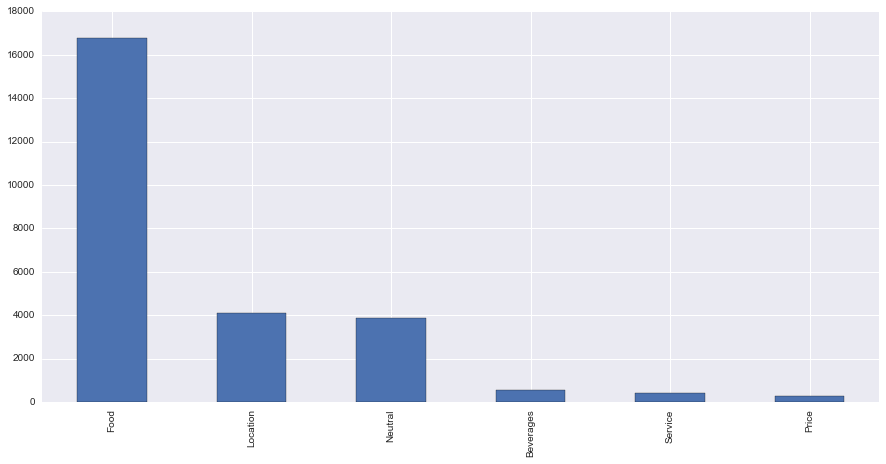

In [74]:
#Review focus
abtDF['Review_Focus'].value_counts().plot(kind = 'bar', figsize=(15, 7))

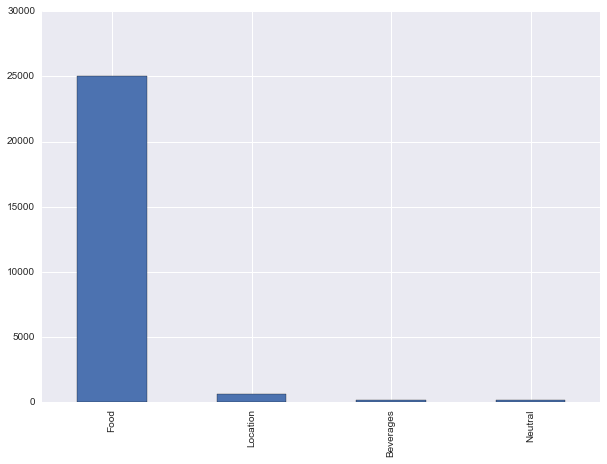

In [75]:
#Business focus
abtDF_master['Business_Focus'].value_counts().plot(kind = 'bar', figsize=(10, 7))

In [76]:
# Location
location_mention = abtDF[abtDF['Location'] > 0]
location_mention_number = len(location_mention)
print('Location was mentioned in ' + str(location_mention_number) + ' reviews, which is ' + str(((location_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Price
price_mention = abtDF[abtDF['Price'] > 0]
price_mention_number = len(price_mention)
print('Price was mentioned in ' + str(price_mention_number) + ' reviews, which is ' + str(((price_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Service
service_mention = abtDF[abtDF['Service'] > 0]
service_mention_number = len(service_mention)
print('Service was mentioned in ' + str(location_mention_number) + ' reviews, which is ' + str(((service_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Beverages
drink_mention = abtDF[abtDF['Beverages'] > 0]
drink_mention_number = len(drink_mention)
print('Beverages was mentioned in ' + str(drink_mention_number) + ' reviews, which is ' + str(((drink_mention_number/total_rows) * 100))
      + '% of the sample size\n')
# Food
food_mention = abtDF[abtDF['Food'] > 0]
food_mention_number = len(food_mention)
print('Food was mentioned in ' + str(location_mention_number) + ' reviews, which is ' + str(((food_mention_number/total_rows) * 100))
      + '% of the sample size\n')

Location was mentioned in 22321 reviews, which is 86.10168183922234% of the sample size

Price was mentioned in 13125 reviews, which is 50.628760993673815% of the sample size

Service was mentioned in 22321 reviews, which is 53.730134238543435% of the sample size

Beverages was mentioned in 14123 reviews, which is 54.478475543897545% of the sample size

Food was mentioned in 22321 reviews, which is 94.54559481561488% of the sample size



Based on the above analysis, similar conclusions can be reached as were with tips regarding what factors users focus on in reviews. Again food is focused on the most with it being the primary focus of most review. Interestingly, next in order is locations which while far behind food in terms of overall business focus and review focus is mentioned in a large amount of reviews. After this, there are drinks, service and price which are all mentioned almost equally .

### Out of the tips how many are positive/negative?

In [77]:
#  positive reviews
positive_rows = abtDF[abtDF['Sentiment'] > 0 ]
positive_rows_num = positive_rows.shape[0]
print('Number of positive reviews ' +str(positive_rows_num))
print('Percentage of reviews which are positive ' + str((positive_rows_num/total_rows)*100) + '%')

#Negative reviews
negative_rows = abtDF[abtDF['Sentiment'] < 0]
negative_rows_num = negative_rows.shape[0]
print('\nNumber of negative reviews ' + str(negative_rows_num))
print('Percentage of reviews which are negative ' + str((negative_rows_num/total_rows) * 100) + '%')

#Neutral reviews
neutral_rows = abtDF[abtDF['Sentiment'] == 0]
neutral_rows_num = neutral_rows.shape[0]

print('\nNumber of neutral reviews ' + str(neutral_rows_num))
print('Percentage of reviews which are neutral ' + str((neutral_rows_num/total_rows) * 100) + '%')

Number of positive reviews 21403
Percentage of reviews which are positive 82.56056164172195%

Number of negative reviews 2856
Percentage of reviews which are negative 11.016818392223422%

Number of neutral reviews 1665
Percentage of reviews which are neutral 6.422619966054621%


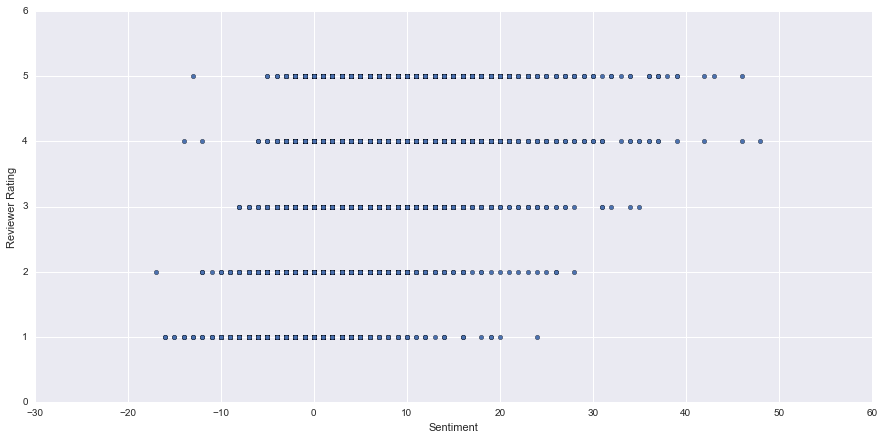

In [78]:
# Plot sentiment against likes and wordcount to see if there is correlation 
abtDF_master.plot.scatter(x='Sentiment', y='Reviewer Rating', figsize = (15,7))

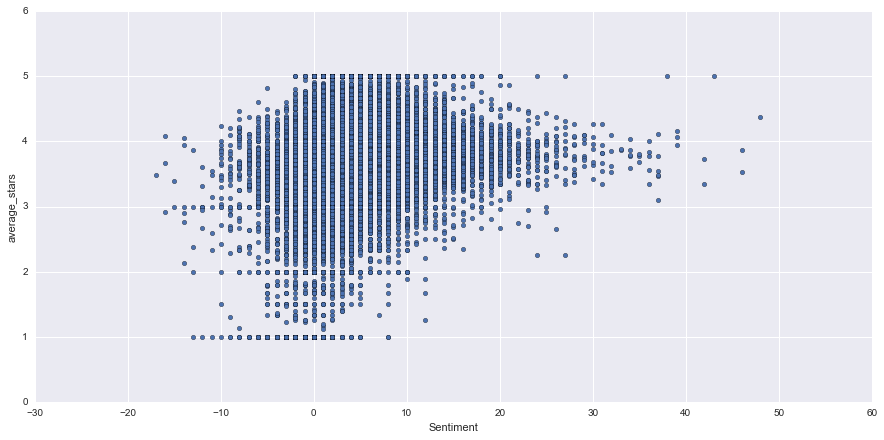

In [79]:
abtDF_master.plot.scatter(x='Sentiment', y='average_stars', figsize = (15,7))

Much like tips, it is found that most reviews are positive in nature with 82% being positive. There is also correlation between text sentiment and reviewer rating and average stars 

### Are tips which mention certain factors long or short, positive of negative?

In [80]:
#Get short reviews
short_reviews = abtDF_master[abtDF_master['WordCount'] > 5]
short_reviews_no = len(short_reviews)
#Long 
long_reviews = abtDF_master[abtDF_master['WordCount'] <= 5]
long_reviews_no = len(long_reviews)

# Location
location_short_rows = short_reviews[short_reviews['Review_Focus'] == 'Location']
location_short_rows_no = len(location_short_rows)
print('Number of shorts reviews were location is mentioned prominently ' + str(location_short_rows_no) + " out of "  + str(short_reviews_no) +" reviews")
print('This makes up ' + str(((location_short_rows_no/short_reviews_no) * 100)) + '% of the short rows')

location_long_rows = long_reviews[long_reviews['Review_Focus'] == 'Location']
location_long_rows_no = len(location_long_rows)
print('Number of long reviews were location is mentioned prominently ' + str(location_long_rows_no) + " out of "  + str(long_reviews_no) +" reviews")
print('This makes up ' + str(((location_long_rows_no/long_reviews_no) * 100)) + '% of the long rows\n\n')

# Service
service_short_rows = short_reviews[short_reviews['Review_Focus'] == 'Service']
service_short_rows_no = len(service_short_rows)
print('Number of shorts reviews were service is mentioned prominently ' + str(service_short_rows_no) + " out of "  + str(short_reviews_no) +" reviews")
print('This makes up ' + str(((service_short_rows_no/short_reviews_no) * 100)) + '% of the short rows')

service_long_rows = long_reviews[long_reviews['Review_Focus'] == 'Service']
service_long_rows_no = len(service_long_rows)
print('Number of long reviews were service is mentioned prominently ' + str(service_long_rows_no) + " out of "  + str(long_reviews_no) +" reviews")
print('This makes up ' + str(((service_long_rows_no/long_reviews_no) * 100)) + '% of the long rows\n\n')

# Price
price_short_rows = short_reviews[short_reviews['Review_Focus'] == 'Price']
price_short_rows_no = len(price_short_rows)
print('Number of shorts reviews were price is mentioned prominently ' + str(price_short_rows_no) + " out of "  + str(short_reviews_no) +" reviews")
print('This makes up ' + str(((price_short_rows_no/short_reviews_no) * 100)) + '% of the short rows')

price_long_rows = long_reviews[long_reviews['Review_Focus'] == 'Price']
price_long_rows_no = len(price_long_rows)
print('Number of long reviews were price is mentioned prominently ' + str(price_long_rows_no) + " out of "  + str(long_reviews_no) +" reviews")
print('This makes up ' + str(((price_long_rows_no/long_reviews_no) * 100)) + '% of the long rows\n\n')

# Beverages
drinks_short_rows = short_reviews[short_reviews['Review_Focus'] == 'Beverages']
drinks_short_rows_no = len(drinks_short_rows)
print('Number of shorts reviews were beverages is mentioned prominently ' + str(drinks_short_rows_no) + " out of "  + str(short_reviews_no) +" reviews")
print('This makes up ' + str(((drinks_short_rows_no/short_reviews_no) * 100)) + '% of the short rows')

drinks_long_rows = long_reviews[long_reviews['Review_Focus'] == 'Beverages']
drinks_long_rows_no = len(drinks_long_rows)
print('Number of long reviews were location is mentioned prominently ' + str(drinks_long_rows_no) + " out of "  + str(long_reviews_no) +" reviews")
print('This makes up ' + str(((location_long_rows_no/long_reviews_no) * 100)) + '% of the long rows\n\n')

# Food
food_short_rows = short_reviews[short_reviews['Review_Focus'] == 'Food']
food_short_rows_no = len(food_short_rows)
print('Number of shorts reviews were food is mentioned prominently ' + str(food_short_rows_no) + " out of "  + str(short_reviews_no) +" reviews")
print('This makes up ' + str(((location_short_rows_no/short_reviews_no) * 100)) + '% of the short rows')

food_long_rows = long_reviews[long_reviews['Review_Focus'] == 'Food']
food_long_rows_no = len(food_long_rows)
print('Number of long reviews were food is mentioned prominently ' + str(food_long_rows_no) + " out of "  + str(long_reviews_no) +" reviews")
print('This makes up ' + str(((location_long_rows_no/long_reviews_no) * 100)) + '% of the long rows\n\n')

Number of shorts reviews were location is mentioned prominently 4086 out of 25772 reviews
This makes up 15.854415644885922% of the short rows
Number of long reviews were location is mentioned prominently 11 out of 152 reviews
This makes up 7.236842105263158% of the long rows


Number of shorts reviews were service is mentioned prominently 388 out of 25772 reviews
This makes up 1.5055098556573026% of the short rows
Number of long reviews were service is mentioned prominently 2 out of 152 reviews
This makes up 1.3157894736842104% of the long rows


Number of shorts reviews were price is mentioned prominently 251 out of 25772 reviews
This makes up 0.9739251901288221% of the short rows
Number of long reviews were price is mentioned prominently 7 out of 152 reviews
This makes up 4.605263157894736% of the long rows


Number of shorts reviews were beverages is mentioned prominently 537 out of 25772 reviews
This makes up 2.0836566816700297% of the short rows
Number of long reviews were locatio

Similar to tips, there does not seem to be a correlation between review lenght and whether it was positive or negative.

### Are reviews were a certain factor is mentioned primarily negative or positive

In [81]:
# Location
location_positive = positive_rows[positive_rows['Review_Focus'] == 'Location']
location_positive_no = len(location_positive)
print('Location was mentioned positively in ' + str(location_positive_no) + ' reviews, which is ' + str(((location_positive_no/location_rows_number) * 100))
      + '% of the sample size')

location_negative = negative_rows[negative_rows['Review_Focus'] == 'Location']
location_negative_no = len(location_negative)
print('Location was mentioned negatively in ' + str(location_negative_no) + ' reviews, which is ' + str(((location_negative_no/location_rows_number) * 100))
      + '% of the sample size')

location_neutral = neutral_rows[neutral_rows['Review_Focus'] == 'Location']
location_neutral_no = len(location_neutral)
print('Location was mentioned neutrally in ' + str(location_neutral_no) + ' reviews, which is ' + str(((location_neutral_no/location_rows_number) * 100))
      + '% of the sample size\n')

# Food
food_positive = positive_rows[positive_rows['Review_Focus'] == 'Food']
food_positive_no = len(food_positive)
print('Food was mentioned positively in ' + str(food_positive_no) + ' reviews, which is ' + str(((food_positive_no/food_rows_number) * 100))
      + '% of the sample size')

food_negative = negative_rows[negative_rows['Review_Focus'] == 'Food']
food_negative_no = len(food_negative)
print('Food was mentioned negatively in ' + str(food_negative_no) + ' reviews, which is ' + str(((food_negative_no/food_rows_number) * 100))
      + '% of the sample size')

food_neutral = neutral_rows[neutral_rows['Review_Focus'] == 'Food']
food_neutral_no = len(food_neutral)
print('Food was mentioned neutrally in ' + str(food_neutral_no) + ' reviews, which is ' + str(((food_neutral_no/food_rows_number) * 100))
      + '% of the sample size\n')

# Price
price_positive = positive_rows[positive_rows['Review_Focus'] == 'Price']
price_positive_no = len(price_positive)
print('Price was mentioned positively in ' + str(location_positive_no) + ' reviews, which is ' + str(((price_positive_no/price_rows_number) * 100))
      + '% of the sample size')

price_negative = negative_rows[negative_rows['Review_Focus'] == 'Price']
price_negative_no = len(price_negative)
print('Price was mentioned negatively in ' + str(location_negative_no) + ' reviews, which is ' + str(((price_negative_no/price_rows_number) * 100))
      + '% of the sample size')

price_neutral = neutral_rows[neutral_rows['Review_Focus'] == 'Price']
price_neutral_no = len(price_neutral)
print('Price was mentioned neutrally in ' + str(price_neutral_no) + ' reviews, which is ' + str(((price_neutral_no/price_rows_number) * 100))
      + '% of the sample size\n')

# Service
service_positive = positive_rows[positive_rows['Review_Focus'] == 'Service']
service_positive_no = len(service_positive)
print('Service was mentioned positively in ' + str(service_positive_no) + ' reviews, which is ' + str(((service_positive_no/service_rows_number) * 100))
      + '% of the sample size')

service_negative = negative_rows[negative_rows['Review_Focus'] == 'Service']
service_negative_no = len(service_negative)
print('Service was mentioned negatively in ' + str(service_negative_no) + ' reviews, which is ' + str(((service_negative_no/service_rows_number) * 100))
      + '% of the sample size')

service_neutral = neutral_rows[neutral_rows['Review_Focus'] == 'Service']
service_neutral_no = len(service_neutral)
print('Service was mentioned neutrally in ' + str(service_neutral_no) + ' reviews, which is ' + str(((service_neutral_no/service_rows_number) * 100))
      + '% of the sample size\n')

# Beverages
drinks_positive = positive_rows[positive_rows['Review_Focus'] == 'Beverages']
drinks_positive_no = len(drinks_positive)
print('Beverages was mentioned positively in ' + str(drinks_positive_no) + ' reviews, which is ' + str(((drinks_positive_no/beverages_rows_number) * 100))
      + '% of the sample size')

drinks_negative = negative_rows[negative_rows['Review_Focus'] == 'Beverages']
drinks_negative_no = len(location_negative)
print('Beverages was mentioned negatively in ' + str(drinks_negative_no) + ' reviews, which is ' + str(((drinks_negative_no/beverages_rows_number) * 100))
      + '% of the sample size')

drinks_neutral = neutral_rows[neutral_rows['Review_Focus'] == 'Beverages']
drinks_neutral_no = len(drinks_neutral)
print('Beverages was mentioned neutrally in ' + str(drinks_neutral_no) + ' reviews, which is ' + str(((drinks_neutral_no/beverages_rows_number) * 100))
      + '% of the sample size\n')

Location was mentioned positively in 3389 reviews, which is 82.71906272882596% of the sample size
Location was mentioned negatively in 450 reviews, which is 10.98364657066146% of the sample size
Location was mentioned neutrally in 258 reviews, which is 6.29729070051257% of the sample size

Food was mentioned positively in 14085 reviews, which is 83.97925113284045% of the sample size
Food was mentioned negatively in 1732 reviews, which is 10.326735034581445% of the sample size
Food was mentioned neutrally in 955 reviews, which is 5.694013832578106% of the sample size

Price was mentioned positively in 3389 reviews, which is 59.68992248062015% of the sample size
Price was mentioned negatively in 450 reviews, which is 27.131782945736433% of the sample size
Price was mentioned neutrally in 34 reviews, which is 13.178294573643413% of the sample size

Service was mentioned positively in 289 reviews, which is 74.1025641025641% of the sample size
Service was mentioned negatively in 79 reviews,

Out of the factors, only price seems to have a correlation with the sentiment of a review. This is to be expected as price is often a point of complaint for restaurants

# Analysis Reviews ABT with tips

In [82]:
# Read merged dataset
DF_abt = pd.read_csv("text_preparation/abt_text_analysis_with_tips.csv", encoding = 'latin-1')
# Test to see if it works
DF_abt.head()

Unnamed: 0             business_id  \
0           0  fNGIbpazjTRdXgwRY_NIXA   
1           1  fNGIbpazjTRdXgwRY_NIXA   
2           2  fNGIbpazjTRdXgwRY_NIXA   
3           3  fNGIbpazjTRdXgwRY_NIXA   
4           4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', '

In [83]:
# Remove unnamed index column
DF_abt = DF_abt.drop(DF_abt.columns[0], axis = 1)
DF_abt.head()

business_id  \
0  fNGIbpazjTRdXgwRY_NIXA   
1  fNGIbpazjTRdXgwRY_NIXA   
2  fNGIbpazjTRdXgwRY_NIXA   
3  fNGIbpazjTRdXgwRY_NIXA   
4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', 'who', 'lives', 'near', 'the', 'place,', 'and', 'after', 'the', 'second', 'trip,', '

In [84]:
# No of rows
DF_abt.shape

(25924, 71)

In [85]:
# Feature Types
DF_abt.dtypes

business_id                  object
categories                   object
city                         object
full_address                 object
latitude                    float64
longitude                   float64
Business name                object
neighborhoods                object
open                           bool
Business review count         int64
Business stars              float64
state                        object
Accepts Credit Cards           bool
Alcohol                      object
Attire                       object
Caters                         bool
Delivery                       bool
Good For Groups                bool
Good for Kids                  bool
Has TV                         bool
Noise Level                  object
Outdoor Seating                bool
Price Range                 float64
Take-out                       bool
Takes Reservations             bool
Waiter Service                 bool
Wheelchair Accessible          bool
Wi-Fi                       

# Modelling/ Prediction

In [86]:
import statsmodels.formula.api as smf

In [87]:
# Dosen't need to be run
#DF_abt= DF_abt.rename(columns={'Business stars': 'Business_stars'})

In [88]:
DF_abt['Business_Focus'].value_counts()

Food         25013
Location       645
Beverages      153
Neutral        113
Name: Business_Focus, dtype: int64

In [89]:
#DF_abt['Positive percentage'].value_counts()
#DF_abt['Negative percentage'].value_counts()
#DF_abt['WordCount'].value_counts()
#DF_abt['Tips Positve Percentage'].value_counts()
#DF_abt['Tips Negative Percentage'].value_counts()
#DF_abt['Tips Business_Focus'].value_counts()

# Regression

In [90]:
# Load abt with tips
review_with_tips_DF = pd.read_csv('text_preparation/abt_text_analysis_with_tips.csv', encoding = 'latin-1') 

In [91]:
# Choose selected features for merge
review_with_tips_DF = review_with_tips_DF.rename(columns={'Business stars' : 'Business_stars', 'Positive percentage': 'Positive_Percentage', 
                                                'Negative percentage': 'Negative_Percentage', 'Tips Business_Focus': 'Tips_Business_Focus',
                                                'Tips Positve Percentage' : 'Tips_Positive_Percentage', 
                                                'Tips Negative Percentage' : 'Tips_Negative_Percentage', 'Reviewer Rating' : 'Reviewer_Rating'})
review_with_tips_DF.head()

Unnamed: 0             business_id  \
0           0  fNGIbpazjTRdXgwRY_NIXA   
1           1  fNGIbpazjTRdXgwRY_NIXA   
2           2  fNGIbpazjTRdXgwRY_NIXA   
3           3  fNGIbpazjTRdXgwRY_NIXA   
4           4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business_stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer_Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', '

The goal of the following regression and classification models are to allow predition based on the text of a review/tip. These models will be trained on 70% of the data in the ABT with tips dataframe. The remaining 30% will he used for testing the models

In [92]:
print('Number of rows and features')
print(review_with_tips_DF.shape)

Number of rows and features
(25924, 72)


In [93]:
print("Types of features")
print(review_with_tips_DF.dtypes)

Types of features
Unnamed: 0                    int64
business_id                  object
categories                   object
city                         object
full_address                 object
latitude                    float64
longitude                   float64
Business name                object
neighborhoods                object
open                           bool
Business review count         int64
Business_stars              float64
state                        object
Accepts Credit Cards           bool
Alcohol                      object
Attire                       object
Caters                         bool
Delivery                       bool
Good For Groups                bool
Good for Kids                  bool
Has TV                         bool
Noise Level                  object
Outdoor Seating                bool
Price Range                 float64
Take-out                       bool
Takes Reservations             bool
Waiter Service                 bool
Wheelchair

#### Training & Test dataset

In [94]:
# Use get dummies to turn categorical featues into continous features for regression
focus_review = pd.get_dummies(review_with_tips_DF['Business_Focus'], prefix='Focus')
focus_tip = pd.get_dummies(review_with_tips_DF['Tips_Business_Focus'], prefix='Tip_Focus')
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
review_with_tips_DF_linear_regression = pd.concat([review_with_tips_DF, focus_review, focus_tip], axis=1)

In [95]:
# Use get dummies to turn categorical featues into continous features for regression
focus_review = pd.get_dummies(review_with_tips_DF['Review_Focus'], prefix='Review_Focus')
# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
review_with_tips_DF_linear_regression = pd.concat([review_with_tips_DF, focus_review], axis=1)
review_with_tips_DF_linear_regression.head()

Unnamed: 0             business_id  \
0           0  fNGIbpazjTRdXgwRY_NIXA   
1           1  fNGIbpazjTRdXgwRY_NIXA   
2           2  fNGIbpazjTRdXgwRY_NIXA   
3           3  fNGIbpazjTRdXgwRY_NIXA   
4           4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business_stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer_Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', '

In [96]:
# Training
# 70% of the dataset is approxiamtely 18147 rows
review_with_tips_DF_train = review_with_tips_DF_linear_regression[:18147]
review_with_tips_DF_train.head()

Unnamed: 0             business_id  \
0           0  fNGIbpazjTRdXgwRY_NIXA   
1           1  fNGIbpazjTRdXgwRY_NIXA   
2           2  fNGIbpazjTRdXgwRY_NIXA   
3           3  fNGIbpazjTRdXgwRY_NIXA   
4           4  fNGIbpazjTRdXgwRY_NIXA   

                                                                  categories  \
0  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
1  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
2  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
3  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   
4  ['Bars', 'American (Traditional)', 'Nightlife', 'Lounges', 'Restaurants']   

       city                               full_address   latitude  longitude  \
0  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
1  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
2  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
3  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   
4  Carnegie  1201 Washington Ave\r\nCarnegie, PA 15106  40.396469 -80.084942   

    Business name neighborhoods  open  Business review count  Business_stars  \
0  Rocky's Lounge            []  True                      7             4.0   
1  Rocky's Lounge            []  True                      7             4.0   
2  Rocky's Lounge            []  True                      7             4.0   
3  Rocky's Lounge            []  True                      7             4.0   
4  Rocky's Lounge            []  True                      7             4.0   

  state Accepts Credit Cards   Alcohol  Attire Caters Delivery  \
0    PA                 True  full_bar  casual  False    False   
1    PA                 True  full_bar  casual  False    False   
2    PA                 True  full_bar  casual  False    False   
3    PA                 True  full_bar  casual  False    False   
4    PA                 True  full_bar  casual  False    False   

  Good For Groups Good for Kids Has TV Noise Level Outdoor Seating  \
0            True          True   True     average           False   
1            True          True   True     average           False   
2            True          True   True     average           False   
3            True          True   True     average           False   
4            True          True   True     average           False   

   Price Range Take-out Takes Reservations Waiter Service  \
0          1.0     True              False           True   
1          1.0     True              False           True   
2          1.0     True              False           True   
3          1.0     True              False           True   
4          1.0     True              False           True   

  Wheelchair Accessible Wi-Fi        date               review_id  \
0                  True  free  2013-09-01  MsoASFxCmOOkOBOqZ80ngQ   
1                  True  free  2014-03-21  f5WKGxGq-XTHJXPXhrC5Cg   
2                  True  free  2014-06-08  c0HELEDmFzwvkdA9hIE8Sg   
3                  True  free  2014-07-24  H8Q56qgKvI8bfvhVuB6tdQ   
4                  True  free  2015-01-06  1C0eSe0umaGzYqck8Uh0WQ   

   Reviewer_Rating  \
0                2   
1                5   
2                5   
3                4   
4                5   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  text  \
0  ['two', 'meals,', 'on', 'the', 'recommendation', 'of', 'a', 'friend', '

In [97]:
# Test 
# Remaining 30% is 7777 rows
review_with_tips_DF_test = review_with_tips_DF_linear_regression[18147:]
review_with_tips_DF_test.head()

Unnamed: 0             business_id  \
18147       18147  kaIue7GRCmkPzDeHDBTttQ   
18148       18148  kaIue7GRCmkPzDeHDBTttQ   
18149       18149  kaIue7GRCmkPzDeHDBTttQ   
18150       18150  kaIue7GRCmkPzDeHDBTttQ   
18151       18151  kaIue7GRCmkPzDeHDBTttQ   

                                      categories     city  \
18147  ['Sushi Bars', 'Japanese', 'Restaurants']  Phoenix   
18148  ['Sushi Bars', 'Japanese', 'Restaurants']  Phoenix   
18149  ['Sushi Bars', 'Japanese', 'Restaurants']  Phoenix   
18150  ['Sushi Bars', 'Japanese', 'Restaurants']  Phoenix   
18151  ['Sushi Bars', 'Japanese', 'Restaurants']  Phoenix   

                                  full_address   latitude   longitude  \
18147  1401 N Central Ave\r\nPhoenix, AZ 85004  33.464098 -112.073569   
18148  1401 N Central Ave\r\nPhoenix, AZ 85004  33.464098 -112.073569   
18149  1401 N Central Ave\r\nPhoenix, AZ 85004  33.464098 -112.073569   
18150  1401 N Central Ave\r\nPhoenix, AZ 85004  33.464098 -112.073569   
18151  1401 N Central Ave\r\nPhoenix, AZ 85004  33.464098 -112.073569   

          Business name neighborhoods  open  Business review count  \
18147  Phoenix Blue Fin            []  True                    172   
18148  Phoenix Blue Fin            []  True                    172   
18149  Phoenix Blue Fin            []  True                    172   
18150  Phoenix Blue Fin            []  True                    172   
18151  Phoenix Blue Fin            []  True                    172   

       Business_stars state Accepts Credit Cards Alcohol  Attire Caters  \
18147             4.0    AZ                 True    none  casual   True   
18148             4.0    AZ                 True    none  casual   True   
18149             4.0    AZ                 True    none  casual   True   
18150             4.0    AZ                 True    none  casual   True   
18151             4.0    AZ                 True    none  casual   True   

      Delivery Good For Groups Good for Kids Has TV Noise Level  \
18147    False           False          True  False     average   
18148    False           False          True  False     average   
18149    False           False          True  False     average   
18150    False           False          True  False     average   
18151    False           False          True  False     average   

      Outdoor Seating  Price Range Take-out Takes Reservations Waiter Service  \
18147            True          1.0     True              False          False   
18148            True          1.0     True              False          False   
18149            True          1.0     True              False          False   
18150            True          1.0     True              False          False   
18151            True          1.0     True              False          False   

      Wheelchair Accessible Wi-Fi        date               review_id  \
18147                  True    no  2008-08-27  pWrIw6M6b_R-uq8Cxb_S9A   
18148                  True    no  2008-09-17  pBKUKp5VlG3DwdXGYD4sSw   
18149                  True    no  2008-09-18  4eNK4otO2kIMjugAsO-39A   
18150                  True    no  2008-10-02  u0yCs7LtIqCOtHU3vo0Eng   
18151                  True    no  2008-10-02  ATWDd56qpelExzOdX5M3KQ   

       Reviewer_Rating  \
18147                4   
18148                4   
18149                4   
18150                4   
18151                4   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      text  \
18147  ['since', 'i', 'love', 'sushi', 'and', 'have', 'been', 

The goal of the following models is to try and predict a business' averages stars based on the amount of tips which they receive. As such the target feature for this will be Business stars. The following descriptive features will be used; Business Focus, Positive Percentage, Negative Percentage, Tip Business Focus, Tip positive percentage, Tip negative percentage. This will be done using the statsmodels library with both logistic and linear regression being completed as well as classification. Exploration will also take place on am individual review basis with the target feature review rating being modeled against descriptive features, Food, Service, Location, Price, Beverages, Sentiment and Review Focus. 

## Linear Regression 

The model above is Business Stars = W_0 + Focus_Food * W_1 + Focus_Food + Focus_Location * W_2 + Positive_Percentage * W_3 + Negative_Percentage * W_4 + Tip_Focus_Food * W5 + Tips_Positive_Percentage * W_6 + Tips_Negative_Percentage * W_7.

In [98]:
#Train a linear regression model for predicting averages business stars
lm = smf.ols(formula="Business_stars ~ Review_Focus_Food + Review_Focus_Location + Positive_Percentage + Negative_Percentage + Tips_Business_Focus +"
             "Tips_Positive_Percentage + Tips_Negative_Percentage", data = review_with_tips_DF_train).fit()

In [99]:
print("Feature types")
print(review_with_tips_DF_train.dtypes)

Feature types
Unnamed: 0                    int64
business_id                  object
categories                   object
city                         object
full_address                 object
latitude                    float64
longitude                   float64
Business name                object
neighborhoods                object
open                           bool
Business review count         int64
Business_stars              float64
state                        object
Accepts Credit Cards           bool
Alcohol                      object
Attire                       object
Caters                         bool
Delivery                       bool
Good For Groups                bool
Good for Kids                  bool
Has TV                         bool
Noise Level                  object
Outdoor Seating                bool
Price Range                 float64
Take-out                       bool
Takes Reservations             bool
Waiter Service                 bool
Wheelchair Acc

In [100]:
print(lm.params)

Intercept                   1.770972
Review_Focus_Food          -0.036145
Review_Focus_Location      -0.002239
Positive_Percentage         0.028520
Negative_Percentage        -0.021119
Tips_Positive_Percentage   -0.002673
Tips_Negative_Percentage   -0.003235
dtype: float64


The model above is Business Stars = 1.349138 +Focus_Food + 0.583441 + Focus_Location + 0.765697 + Positive_Percentage *   0.012646 + Negative_Percentage * -0.043013 + Tip_Focus_Food * 1.349138 + Tips_Positive_Percentage * -0.001930 + Tips_Negative_Percentage * -0.008590. 

In [101]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         Business_stars   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     5788.
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        21:10:46   Log-Likelihood:                -4638.0
No. Observations:               18042   AIC:                             9290.
Df Residuals:                   18035   BIC:                             9345.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [102]:
# Check the r-squared of a model
print("This is the r-squared")
print(lm.rsquared)

This is the r-squared
0.658197526893


In [103]:
# print the confidence intervals for the model coefficients
lm.conf_int()

0         1
Intercept                 1.643594  1.898350
Review_Focus_Food        -0.047879 -0.024411
Review_Focus_Location    -0.017705  0.013227
Positive_Percentage       0.027189  0.029850
Negative_Percentage      -0.022730 -0.019509
Tips_Positive_Percentage -0.003008 -0.002339
Tips_Negative_Percentage -0.003763 -0.002707

The above confidence interval reflect a low variance for the descriptive features

In [104]:
# print the p-values for the model coefficients
lm.pvalues

Intercept                   2.759302e-160
Review_Focus_Food            1.594553e-09
Review_Focus_Location        7.766213e-01
Positive_Percentage          0.000000e+00
Negative_Percentage         4.406690e-143
Tips_Positive_Percentage     7.304686e-55
Tips_Negative_Percentage     3.874111e-33
dtype: float64

The above model suggests that all these features are indeed significant to the target feature, the average number of stars a business gets. This is as expected as food is always going to be an important factor for the majority of businesses which are on Yelp. The same is true of whether a review is positive or negative. Negative reviews and tips have a negative impact on the stars a business has while positive tips also has a neglible impact suggesting that it lacks importance. This conclusions are to be expected. Any area which may prove to be more fortutious regarding unexpected results. Before, this takes place, further exploration of the current model will take place with testing of the current model and features as well as logitics regrassion and classifiction. 

#### Test multilinear regression model

In [105]:
#lm.predict(review_with_tips_DF_train)

In [106]:
# Model predictions
#print("Actual - Predicted:\n", (review_with_tips_DF_train['Business_stars'] - lm.predict(review_with_tips_DF_train)))
#print("\n(Actual - Predicted) squared:\n", (review_with_tips_DF_train['Business_stars'] -lm.predict(review_with_tips_DF_train))**2)

In [107]:
# Mean Squared Error of the model 
#mse = ((review_with_tips_DF_train['Business_stars'] - lm.predict(review_with_tips_DF_train))**2).mean()
#print("\nMean Squared Error:\n", mse)

In [108]:
#print("|Actual - Predicted|:\n", abs(review_with_tips_DF_train['Business_stars'] 
                                #     - lm.predict(review_with_tips_DF_train)))

In [109]:
# Mean absolute error of model on training set
#mae = abs(review_with_tips_DF_train['Business_stars'] 
                                  #   - lm.predict(review_with_tips_DF_train)).mean()
#print("\nMean Absolute Error:\n", mae)

### Test model on test set now

In [110]:
# Model predicitions
#print("Actual - Predicted:\n", (review_with_tips_DF_test['Business_stars'] -
                              #  lm.predict(review_with_tips_DF_test)))
#print("\n(Actual - Predicted) squared:\n", (review_with_tips_DF_test['Business_stars'] -
                               # lm.predict(review_with_tips_DF_test))**2)

In [111]:
# Mean Squared Error of the model 
#mse = ((review_with_tips_DF_train['Business_stars'] - lm.predict(review_with_tips_DF_test))**2).mean()
#print("\nMean Squared Error:\n", mse)

In [112]:
#print("|Actual - Predicted|:\n", abs(review_with_tips_DF_test['Business_stars'] 
                                #     - lm.predict(review_with_tips_DF_test)))

In [113]:
# Mean absolute error of model on test set
#mae = abs(review_with_tips_DF_test['Business_stars'] 
                               #      - lm.predict(review_with_tips_DF_test)).mean()
#print("\nMean Absolute Error:\n", mae)

In calculating the various errors between the two datasets it can be concluded that there is no significant cause of error. Unfortunately I was only able to run the above cells once before encountering an issue with the predict function. AttributeError: 'DataFrame' object has no attribute 'design_info' I was unable to resolve this

In [119]:
#Train a linear regression model for predicting averages business stars
lm = smf.ols(formula="Reviewer_Rating~ Sentiment + Food + Service + Price + Location + Beverages",
             data = review_with_tips_DF_train).fit()

In [120]:
print(lm.params)

Intercept    3.605448
Sentiment    0.136645
Food        -0.023557
Service     -0.104936
Price       -0.075057
Location    -0.044269
Beverages   -0.014900
dtype: float64


In [121]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:        Reviewer_Rating   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     989.1
Date:                Sun, 08 May 2016   Prob (F-statistic):               0.00
Time:                        21:19:33   Log-Likelihood:                -27265.
No. Observations:               18147   AIC:                         5.454e+04
Df Residuals:                   18140   BIC:                         5.460e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.6054      0.013    285.213      0.0

In [122]:
# Check the r-squared of a model
print("This is the r-squared")
print(lm.rsquared)

This is the r-squared
0.246516151779


In [124]:
# print the confidence intervals for the model coefficients
lm.conf_int()

0         1
Intercept  3.580670  3.630226
Sentiment  0.133023  0.140268
Food      -0.026439 -0.020674
Service   -0.117893 -0.091979
Price     -0.086649 -0.063466
Location  -0.050651 -0.037888
Beverages -0.024250 -0.005549

In [123]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    0.000000e+00
Sentiment    0.000000e+00
Food         2.330872e-57
Service      2.275955e-56
Price        9.364526e-37
Location     6.648622e-42
Beverages    1.790570e-03
dtype: float64

 #### Test multilinear regression model

In [145]:
# print predicted target feature for examples in the training set
lm.predict(review_with_tips_DF_train)

array([ 1.92582897,  3.78550553,  3.47219509, ...,  3.55086667,
        3.04934647,  4.49199494])

In [126]:
# Model predictions
print("Actual - Predicted:\n", (review_with_tips_DF_train['Reviewer_Rating'] - lm.predict(review_with_tips_DF_train)))
print("\n(Actual - Predicted) squared:\n", (review_with_tips_DF_train['Reviewer_Rating'] -lm.predict(review_with_tips_DF_train))**2)

Actual - Predicted:
 0        2.074171
1        0.214494
2        0.527805
3        0.737259
4        0.278051
5       -0.480730
6       -0.060647
7        0.973820
8        0.281995
9        0.253136
10       1.470869
11       0.881928
12       1.162449
13       0.924287
14       0.876076
15       0.665530
16       0.695574
17       0.773310
18       0.856036
19       0.575005
20       0.849289
21       1.745170
22      -0.239193
23       0.781404
24       0.584092
25      -0.453836
26       1.888946
27       0.781463
28       1.260639
29       1.221279
           ...   
18117   -0.683414
18118    0.331764
18119   -0.878739
18120   -0.714730
18121   -0.670494
18122   -0.718472
18123   -0.642486
18124   -0.367829
18125    0.776281
18126   -0.606442
18127   -0.191654
18128    0.565480
18129   -0.109522
18130    2.411707
18131    0.706016
18132   -0.428985
18133   -0.775914
18134   -1.161680
18135   -0.903289
18136   -0.953371
18137   -1.226237
18138   -0.275969
18139   -0.921157
18140  

In [146]:
# Threshold the predicted target feature to get the predicted class for each example. We threshold at the values that
# are between the two class values, e.g. threshold at 4.75 to decide if a predicted business stars rating should be 5
# stars or below 5 stars. The further conditional statements to find the correct class.

# add column for values of prediction of target feature
review_with_tips_DF_train['predicted_business_stars'] = lm.predict(review_with_tips_DF_train)

# list to hold thresholded predictions
thresholded_rating = []

# loop to determine if business has a specified cuisine
for i in range(len(review_with_tips_DF_train)):
    if review_with_tips_DF_train.predicted_business_stars.iloc[i] > 4.75:
        thresholded_rating.append(5.0)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 4.25:
        thresholded_rating.append(4.5)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 3.75:
        thresholded_rating.append(4.0)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 3.25:
        thresholded_rating.append(3.5)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 2.75:
        thresholded_rating.append(3.0)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 2.25:
        thresholded_rating.append(2.5)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 1.75:
        thresholded_rating.append(2.0)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 1.25:
        thresholded_rating.append(1.5)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 0.75:
        thresholded_rating.append(1.0)
    elif review_with_tips_DF_train.predicted_business_stars.iloc[i] > 0.25:
        thresholded_rating.append(0.5)
    else:
        thresholded_rating.append(0.0)

# change predicted_business_stars column to hold thresholded values
review_with_tips_DF_train['predicted_business_stars'] = thresholded_rating

C:\Users\ray\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\ray\Anaconda3\lib\site-packages\ipykernel\__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [151]:
# show head of actual business stars and predicted business stars for each reviw
review_with_tips_DF_train[['Reviewer_Rating', 'predicted_business_stars']].head(100)

Reviewer_Rating  predicted_business_stars
0                 2                       2.0
1                 5                       4.0
2                 5                       3.5
3                 4                       3.5
4                 5                       3.5
5                 3                       4.5
6                 4                       4.0
7                 3                       3.5
8                 4                       4.0
9                 5                       4.0
10                4                       3.0
11                5                       3.5
12                5                       3.5
13                4                       3.5
14                5                       3.5
15                5                       4.0
16                5                       4.0
17                4                       3.5
18                4                       3.5
19                4                       4.0
20                5                       3.5
21                3                       3.0
22                5                       4.5
23                5                       3.5
24                5                       4.0
25                5                       5.0
26                5                       2.5
27                5                       3.5
28                4                       3.0
29                5                       3.5
..              ...                       ...
70                5                       3.5
71                3                       3.5
72                4                       4.0
73                5                       5.0
74                4                       3.5
75                1                       2.5
76                4                       4.0
77                4                       4.5
78                4                       4.0
79                4                       4.0
80                2                       1.0
81                4                       4.0
82                4                       4.0
83                4                       3.5
84                2                       3.5
85                3                       3.0
86                2                       3.5
87                4                       3.5
88                2                       3.0
89                2                       3.5
90                4                       5.0
91                4                       4.0
92                4                       3.5
93                4                       3.5
94                4                       4.0
95                1                       0.5
96                5                       4.5
97                5                       4.5
98                3                       3.5
99                5                       4.0

[100 rows x 2 columns]

In [129]:
print("|Actual - Predicted|:\n", abs(review_with_tips_DF_train['Reviewer_Rating'] - lm.predict(review_with_tips_DF_train)))

|Actual - Predicted|:
 0        2.074171
1        0.214494
2        0.527805
3        0.737259
4        0.278051
5        0.480730
6        0.060647
7        0.973820
8        0.281995
9        0.253136
10       1.470869
11       0.881928
12       1.162449
13       0.924287
14       0.876076
15       0.665530
16       0.695574
17       0.773310
18       0.856036
19       0.575005
20       0.849289
21       1.745170
22       0.239193
23       0.781404
24       0.584092
25       0.453836
26       1.888946
27       0.781463
28       1.260639
29       1.221279
           ...   
18117    0.683414
18118    0.331764
18119    0.878739
18120    0.714730
18121    0.670494
18122    0.718472
18123    0.642486
18124    0.367829
18125    0.776281
18126    0.606442
18127    0.191654
18128    0.565480
18129    0.109522
18130    2.411707
18131    0.706016
18132    0.428985
18133    0.775914
18134    1.161680
18135    0.903289
18136    0.953371
18137    1.226237
18138    0.275969
18139    0.921157
18140

In [127]:
# Mean Squared Error of the model 
mse = ((review_with_tips_DF_train['Reviewer_Rating'] - lm.predict(review_with_tips_DF_train))**2).mean()
print("\nMean Squared Error:\n", mse)


Mean Squared Error:
 0.5344643724498406


In [133]:
# Mean absolute error of model on training set
mae = abs(review_with_tips_DF_train['Reviewer_Rating'] - lm.predict(review_with_tips_DF_train)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 0.5590397246501764


In [154]:
# count correct predictions and number of incorrect predictions for each level of incorrect prediction

# initialise counter variables to count the number of correct predictions, and the number of incorrect predictions for
# each error level
correct = 0
error_0_5 = 0
error_1 = 0
error_1_5 = 0
error_2 = 0
error_2_5 = 0
error_3 = 0
error_3_5 = 0
error_4 = 0
error_4_5 = 0
error_5 = 0
for i in range(len(review_with_tips_DF_train)):
    x = abs(review_with_tips_DF_train.Reviewer_Rating.iloc[i] - review_with_tips_DF_train.predicted_business_stars.iloc[i])
    if x == 0:
        correct += 1
    elif x == 0.5:
        error_0_5 += 1
    elif x == 1.0:
        error_1 += 1
    elif x == 1.5:
        error_1_5 += 1
    elif x == 2.0:
        error_2 += 1
    elif x == 2.5:
        error_2_5 += 1
    elif x == 3.0:
        error_3 += 1
    elif x == 3.5:
        error_3_5 += 1
    elif x == 4.0:
        error_4 += 1
    elif x == 4.5:
        error_4_5 += 1
    elif x == 5.0:
        error_5 += 1
        
print('Correct predictions:', correct, '\nError of 0.5:', error_0_5, '\nError of 1.0:', error_1, 
      '\nError of 1.5:', error_1_5,
      '\nError of 2.0:', error_2, 
      '\nError of 2.5:', error_2_5,
      '\nError of 3.0:', error_3,
      '\nError of 3.5:', error_3_5,
      '\nError of 4.0:', error_4,
      '\nError of 4.5:', error_4_5,
      '\nError of 5.0:', error_5)

Correct predictions: 3222 
Error of 0.5: 5231 
Error of 1.0: 4966 
Error of 1.5: 3008 
Error of 2.0: 1070 
Error of 2.5: 562 
Error of 3.0: 78 
Error of 3.5: 6 
Error of 4.0: 4 
Error of 4.5: 0 
Error of 5.0: 0


In [156]:
# Check the accuracy on the training set. 
# The accuracy is the ratio of correct predictions to total examples
print('Accuracy of model:', 3222/18147)

Accuracy of model: 0.17755000826582906


In [158]:
# using mean actual business stars as a very simple baseline prediction model, compare its accuracy to that of our
# model. Below we see that 3.5 is the predicted classification of this very simple baseline model.
review_with_tips_DF_train.Reviewer_Rating.mean()

3.6777979831377086

In [160]:
# find accuracy of baseline prediction model
baseline_correct = 0
for i in range(len(review_with_tips_DF_train)):
    x = abs(review_with_tips_DF_train.Reviewer_Rating.iloc[i] - 3.5)
    if x == 0:
        baseline_correct += 1
        
print('Number of correct predictions with baseline predictive model:', baseline_correct,
     '\nAccuracy of baseline predictive model:', baseline_correct/18147)

Number of correct predictions with baseline predictive model: 0 
Accuracy of baseline predictive model: 0.0


#### Test model on test set now

In [161]:
# Model predicitions
print("Actual - Predicted:\n", (review_with_tips_DF_test['Reviewer_Rating'] - lm.predict(review_with_tips_DF_test)))
print("\n(Actual - Predicted) squared:\n", (review_with_tips_DF_test['Reviewer_Rating'] - lm.predict(review_with_tips_DF_test))**2)

Actual - Predicted:
 18147    1.303935
18148    0.206896
18149    0.687149
18150    0.839618
18151    0.228604
18152   -0.056240
18153    0.132323
18154    0.761218
18155    1.376670
18156    0.556986
18157    1.161719
18158   -0.024956
18159   -0.181665
18160    1.302052
18161    1.097163
18162   -0.060877
18163    1.939507
18164    1.061524
18165    0.914803
18166    0.453167
18167    0.009450
18168    1.940585
18169   -0.354037
18170   -1.348304
18171    0.182785
18172    0.283883
18173    0.397447
18174   -0.624021
18175   -0.960304
18176    1.097077
           ...   
25894   -1.246393
25895   -0.001406
25896    0.099555
25897   -1.764294
25898   -0.481168
25899   -1.346741
25900   -0.465507
25901    0.738998
25902    1.013725
25903   -1.153023
25904    1.089905
25905   -0.261364
25906    0.770430
25907    0.589793
25908    1.273225
25909    0.218044
25910   -0.130865
25911    0.225203
25912    1.467913
25913   -0.788995
25914   -0.160183
25915   -0.023184
25916    1.505653
25917  

In [162]:
print("|Actual - Predicted|:\n", abs(review_with_tips_DF_test['Reviewer_Rating']  - lm.predict(review_with_tips_DF_test)))

|Actual - Predicted|:
 18147    1.303935
18148    0.206896
18149    0.687149
18150    0.839618
18151    0.228604
18152    0.056240
18153    0.132323
18154    0.761218
18155    1.376670
18156    0.556986
18157    1.161719
18158    0.024956
18159    0.181665
18160    1.302052
18161    1.097163
18162    0.060877
18163    1.939507
18164    1.061524
18165    0.914803
18166    0.453167
18167    0.009450
18168    1.940585
18169    0.354037
18170    1.348304
18171    0.182785
18172    0.283883
18173    0.397447
18174    0.624021
18175    0.960304
18176    1.097077
           ...   
25894    1.246393
25895    0.001406
25896    0.099555
25897    1.764294
25898    0.481168
25899    1.346741
25900    0.465507
25901    0.738998
25902    1.013725
25903    1.153023
25904    1.089905
25905    0.261364
25906    0.770430
25907    0.589793
25908    1.273225
25909    0.218044
25910    0.130865
25911    0.225203
25912    1.467913
25913    0.788995
25914    0.160183
25915    0.023184
25916    1.505653
25917

In [163]:
# Mean absolute error of model on test set
mae = abs(review_with_tips_DF_test['Reviewer_Rating'] - lm.predict(review_with_tips_DF_test)).mean()
print("\nMean Absolute Error:\n", mae)


Mean Absolute Error:
 0.8921533722281841


Unfortunately the above model has a significant mean squared error and poor accuracy overall both on the training set and the test set. This means that any predictions which are made using this models are likley to be inaccurate result. 

### Conclusion
Using the limited regression models created above, we can make some basic conclusions and predictions although not with any strong certainty due to the possible error margin which is present. Another possible issue with the first model is that the value Food was so dominant in the features produced by textual analysis. To get a better idea of what things could affect a business' succces, it would be useful to exclude Food as a factor when calculating a busineess's focus. However this may result in further issues as many reviews and tips may just solely focus on Food leaving a limited dataset size with which to work.

Based on the above exploration and limited modelling above some findings can be made. Most tips and reviews based on text analysis were positive or neutral in nature with only a small minority being negative. This is supported both by textual analysis on tips and reviews which found that in the most frequent words there was a predominance of positive words. Due to the manner of sentiment anlysis were reviews were grouped into three categories based on sentiment scores which are positive, negative and netural. Having further gradiations of positve and negative sentiment may have been more useful as this would allow for a more specfic examination of how specfic factors are tied to sentiment. In its current state, only price has any ties to sentiments as seen in the higher percentage of reviews it is in which are negative compared to other factors
One of the more interestingly findings from the textual analysis was that location while falling behind food in terms of focus was almost mentioned as much in reviews. Other factors such as price, service and beverages all recieved approxiametly the same amount of mentions. 

To conclude the findings from the textual analysis of tips and reviews, the following was found. Most reviews or tips were positive with only a small minority being negative. Food was the main focus of reviews/tips with location secondary. All other factors were around the same level of importance in terms of being mentioned in reviews and tips.